# Section 3. Import Libraries  
• Create a code block to import the following libraries: 
o numpy as np 
o pandas as pd  
o matplotlib.pyplot as plt 
o statsmodels 
o statsmodels.api as sm 
o seaborn as sns 
o Set the plt.style.use to ‘seaborn’

In [1]:
# CodeBlock Section 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import seaborn as sns

plt.style.use('seaborn')
pd.set_option('display.max_rows', 100)

# Section 4-1 Import Data
• Create a code block to import ‘Real Estate Data – Week 6.csv’ as df_realestate  with 
index_col = 0 and header=0. (Note, the path should be similar ‘data/Real Estate 
Data – Week 6.csv’.) 

In [2]:
# CodeBlock Section 4-1

df_realestate = pd.read_csv('data/Real Estate Data - Week 6.csv', index_col = 0, header = 0 )

# Section 4-2
• Create a code block and execute to view the .info() for df_realestate. 

In [3]:
df_realestate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Dwelling Type                  1387 non-null   object 
 1   Lot Frontage                   1387 non-null   int64  
 2   Lot Area                       1387 non-null   int64  
 3   Land Contour                   1387 non-null   object 
 4   Neighborhood                   1387 non-null   object 
 5   Location Condition             1387 non-null   object 
 6   Overall Quality                1387 non-null   int64  
 7   Overall Cond                   1387 non-null   int64  
 8   Year Built                     1387 non-null   int64  
 9   Masonry/Veneer Area            1387 non-null   int64  
 10  Basement Finished Area         1387 non-null   int64  
 11  Basement Unfinished Area       1387 non-null   int64  
 12  1st Floor Area                 1387 non-null   i

# Section 5a1: Encode Kitchen Qual 
• Create a code block to import Label Encoder from sklearn. 
o from sklearn.preprocessing import LabelEncoder 
o lc = LabelEncoder(

In [4]:
# CodeBlock Section 5a1

from sklearn.preprocessing import LabelEncoder 
lc = LabelEncoder() 

# Section 5a2
• Create a code block and to show a groupby or value_count for Kitchen Qual.

In [5]:
# CodeBlock Section 5a2

df_realestate['Kitchen Qual'].value_counts()

Average      691
Good         575
Excellent     88
Fair          33
Name: Kitchen Qual, dtype: int64

# Section 5a3

• Create a code block to encode the values for Kitchen Qual for: 
o Fair = 1 
o Average = 2 
o Good = 3 
o Excellent = 4 
• Note: you will need a defined function.

In [6]:
# CodeBlock Section 5a3

def KitchenQual(c): 
   if c['Kitchen Qual']  == 'Fair': 
    return 1 
   elif c['Kitchen Qual'] == 'Average': 
    return 2 
   elif c['Kitchen Qual'] == 'Good':
    return 3
   elif c['Kitchen Qual'] == 'Excellent':
    return 4
   else:
    return 0
df_realestate['Kitchen Qual'] = df_realestate.apply(KitchenQual, axis=1)
df_realestate['Kitchen Qual'].value_counts()

2    691
3    575
4     88
1     33
Name: Kitchen Qual, dtype: int64

# Section 5b1: Create X and y 

• Create a code block to create X and y by including the quantitative features that 
should be included in the model for X and ‘Sale Price’ for y.  
• X should include: 
o All features that meet the criteria for regression.  The features cannot be 
objects or cannot be features that have null values. 
• y should include: 
o ‘Sale Price’

In [7]:
# CodeBlock Section 5b1

X = df_realestate
X = X.drop(['Sale Price', 'Dwelling Type', 'Land Contour', 'Neighborhood', 'Location Condition', 'Garage Finish', 'Sale Condition', ], axis=1)
y = df_realestate['Sale Price']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 1 to 1460
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Lot Frontage                   1387 non-null   int64  
 1   Lot Area                       1387 non-null   int64  
 2   Overall Quality                1387 non-null   int64  
 3   Overall Cond                   1387 non-null   int64  
 4   Year Built                     1387 non-null   int64  
 5   Masonry/Veneer Area            1387 non-null   int64  
 6   Basement Finished Area         1387 non-null   int64  
 7   Basement Unfinished Area       1387 non-null   int64  
 8   1st Floor Area                 1387 non-null   int64  
 9   2nd Floor Area                 1387 non-null   int64  
 10  Bedrooms Above Grade           1387 non-null   int64  
 11  Kitchen Qual                   1387 non-null   int64  
 12  Total Rooms Above Grade        1387 non-null   i

# Section 5b3 Explanation of the Results  
• Explain the process that you used to decide which features to include in your X dataset.

For the x data set. I have decided to include all of the quantitative features that can be measured in the regression model including the encoded kitchen qual variable. The sale price was also dropped because it’s the target variable and doesn’t need to be included in the X data set. 

# Section 6a1: Create Initial Multiple Regression Model 
• There are a lot of features in this model.  We expect many of these features to not 
have a significant relationship to ‘Sale Price’ but the first model will include ALL 
features that are included in X. 
• Create a code block to run an initial model that includes all of the features in X.

In [8]:
# CodeBlock Section 6a1
# Model 1
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     191.4
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:14   Log-Likelihood:                -15771.
No. Observations:                1387   AIC:                         3.169e+04
Df Residuals:                    1314   BIC:                         3.207e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -7.37e+05   1.22e+05     -6.054      0.000   -9.76e+05   -4.98e+05
Lot Frontage                     16.2026     19.373      0.836      0.403     -21.802      54.208
Lot Area                          0.4963      0.073      6.836      0.000       0.354       0.639
Overall Quality                1.054e+04    862.880     12.211      0.000    8843.549    1.22e+04
Overall Cond                   5107.9003    650.561      7.852      0.000    3831.649    6384.151
Year Built                      349.8146     62.145      5.629      0.000     227.900     471.730
Masonry/Veneer Area              14.0911      4.185      3.367      0.001       5.881      22.301
Basement Finished Area           26.0092      2.680      9.704      0.000      20.751      31.267
Basement Unfinished Area          7.2778      2.528      2.878      0.004       2.318      12.238
1st Floor Area                   60.8760      3.793     16.051      0.000      53.436      68.316
2nd Floor Area                   53.5656      4.169     12.847      0.000      45.386      61.745
Bedrooms Above Grade          -6219.4783   1500.010     -4.146      0.000   -9162.154   -3276.803
Kitchen Qual                   7779.8173   1379.493      5.640      0.000    5073.569    1.05e+04
Total Rooms Above Grade        1119.4356    841.691      1.330      0.184    -531.770    2770.641
Fireplaces                     1976.2561   1181.847      1.672      0.095    -342.257    4294.769
Garage Cars                    8684.2320   1446.765      6.003      0.000    5846.011    1.15e+04
Porch Area                       23.3942      4.358      5.368      0.000      14.845      31.943
Full Bathrooms                 2867.3070   1820.549      1.575      0.116    -704.194    6438.808
Half Bathrooms                 1735.6605   1513.552      1.147      0.252   -1233.582    4704.902
Pool                           1.163e+04   1.02e+04      1.138      0.255   -8409.871    3.17e+04
Extra Kitchens                -1.781e+04   5061.708     -3.518      0.000   -2.77e+04   -7878.878
Baths per Bedroom              -205.7628   3590.064     -0.057      0.954   -7248.646    6837.120
dt_1-1/2 STORY ALL AGES       -4648.5365   3621.887     -1.283      0.200   -1.18e+04    2456.776
dt_1-STORY 1945 & OLDER        -409.4888   4039.034     -0.101      0.919   -8333.150    7514.172
dt_1-STORY PUD                -2.345e+04   3579.192     -6.550      0.000   -3.05e+04   -1.64e+04
dt_2 FAMILY CONVERSION        -5411.7038   5885.119     -0.920      0.358    -1.7e+04    6133.552
dt_2-1/2 STORY ALL AGES       -8211.6370   7565.625     -1.085      0.278   -2.31e+04    6630.387
dt_2-STORY 1945 & OLDER       -4956.7594   5148.371     -0.963      0.336   -1.51e+04    5143.166
dt_2-STORY 1946 & NEWER       -4689.1169   38

# Section 6b1

Visualize the Residual Plots 
• Create a code block for a jointplot with residuals and predictions.

In [9]:
# CodeBlock Section 6b1
# concatinating pred and resid
X = pd.concat([X,pred,resid], axis=1)

In [10]:
# CodeBlock Section 6b1
# renaming columns
X = X.rename(columns = {0:'pred', \
                        1: 'resid'})

<Figure size 1440x576 with 0 Axes>

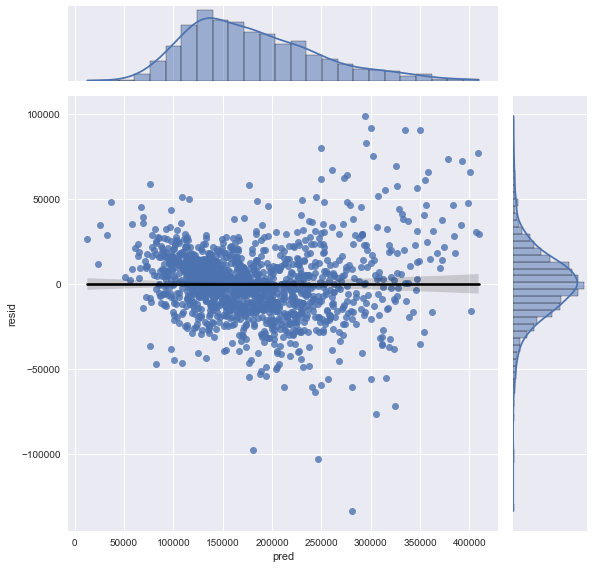

In [11]:
# CodeBlock Section 6b1
# Joint Plot.  
plt.style.use('seaborn')
plt.figure(figsize=(20,8))
sns.jointplot(y='resid', x='pred',kind='reg', data= X, ratio=5, height = 8, line_kws={'color': 'black'})

#  Section 6b2
Create a Correlation Matrix  
• Create a code block to create a DataFrame named features and create a correlation 
matrix for the features in the features DataFrame.  Name the new correlation matrix 
corrMatrix and then change it to a DataFrame and name it df_corrMatrix.

In [12]:
# CodeBlock Section 6b2
features = X
corrMatrix = features.corr()
df_corrMatrix = pd.DataFrame(corrMatrix)


#  Section 6b3

Create the Variance Inflation Factor (VIF)  
• Create a code block to create VIF for the features in the multiple regression.  This is 
for reference only at this point, but it will be an indication of possible features to 
exclude. 

In [13]:
# CodeBlock Section 6b3

# importing variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
# CodeBlock Section 6b3

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
37,inf,nh_Bluestem
45,inf,nh_Iowa DOT and Rail Road
51,inf,nh_Northwest Ames
50,inf,nh_Northridge Heights
49,inf,nh_Northridge
48,inf,nh_Northpark Villa
47,inf,nh_Mitchell
46,inf,nh_Meadow Village
44,inf,nh_Gilbert
53,inf,nh_Sawyer


# CodeBlock Section 6b4 Explanation of the Results 
o Report the results for the model: 
§ R-Squared is 0.913
§ AIC is 3.169e+04 and BIC is 3.207e+04
§ F-Statistic is 191.4 and Prob (F-statistic) is 0.00
o Explain what you see.  Are there several features that should be excluded?  
Yes, all feature variables with p values greater than 0.50 should be excluded. 

Is there a lot of multi-collinearity? 
Yes, majority of the feature variables have a VIF score greater than 5.00 and have multi-collinearity.
 Is the model strong?
Based on the R squared and Adjusted R square, the model is strong. However there is multi-collinearity in a lot of feature variables that need to be excluded.


# Section 7a1: Re-run a Multiple Regression model (Model 2) after removing 
the features with a p-value above 0.100 
HW06 – Encoding Qualitative Variables and Interaction   
7 
 
 
Create a new Multiple Regression Model (Model 2) 
• Create a code block that drops all features that have a p-value above 0.100 from 
the X dataset.

In [15]:
# CodeBlock Section 7a1
X = X.drop(['nh_Meadow Village', 'Lot Frontage', 'Total Rooms Above Grade','Full Bathrooms', 'Half Bathrooms', 'Pool', 'Baths per Bedroom', 'dt_1-1/2 STORY ALL AGES', 'dt_1-STORY 1945 & OLDER', 'dt_2 FAMILY CONVERSION', 'dt_2-1/2 STORY ALL AGES', 'dt_2-STORY 1945 & OLDER', 'dt_2-STORY 1946 & NEWER', 'dt_DUPLEX', 'dt_SPLIT FOYER', 'dt_SPLIT OR MULTI-LEVEL', 'lc_Banked', 'lc_Depression', 'nh_Bloomington Heights', 'nh_Bluestem', 'nh_Clear Creek', 'nh_College Creek', 'nh_Edwards', 'nh_Gilbert', 'nh_Iowa DOT and Rail Road', 'nh_Meadow Village', 'nh_Mitchell', 'nh_Old Town', 'nh_Sawyer', 'nh_Sawyer West', 'nh_South & West of Iowa State', 'nh_Timberland', 'locc_Adjacent Pos Feature', 'locc_Near Railroad', 'sc_Allocation'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 1 to 1460
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   const                      1387 non-null   float64
 1   Lot Area                   1387 non-null   int64  
 2   Overall Quality            1387 non-null   int64  
 3   Overall Cond               1387 non-null   int64  
 4   Year Built                 1387 non-null   int64  
 5   Masonry/Veneer Area        1387 non-null   int64  
 6   Basement Finished Area     1387 non-null   int64  
 7   Basement Unfinished Area   1387 non-null   int64  
 8   1st Floor Area             1387 non-null   int64  
 9   2nd Floor Area             1387 non-null   int64  
 10  Bedrooms Above Grade       1387 non-null   int64  
 11  Kitchen Qual               1387 non-null   int64  
 12  Fireplaces                 1387 non-null   int64  
 13  Garage Cars                1387 non-null   int64

# Section 7a2
• Create a code block and execute Model 2 using statsmodels

In [16]:
# CodeBlock Section 7a2
# Model 2
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.388e+30
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:15   Log-Likelihood:                 28230.
No. Observations:                1387   AIC:                        -5.638e+04
Df Residuals:                    1346   BIC:                        -5.616e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -6.985e-10   2.74e-09     -0.255      0.799   -6.08e-09    4.68e-09
Lot Area                  -9.992e-16   1.91e-15     -0.522      0.602   -4.75e-15    2.75e-15
Overall Quality            7.276e-12    3.5e-11      0.208      0.836   -6.15e-11     7.6e-11
Overall Cond               9.095e-12   1.85e-11      0.493      0.622   -2.71e-11    4.53e-11
Year Built                 1.137e-13   1.33e-12      0.086      0.932   -2.49e-12    2.72e-12
Masonry/Veneer Area         6.04e-14   7.86e-14      0.768      0.443   -9.39e-14    2.15e-13
Basement Finished Area    -3.553e-14   9.49e-14     -0.374      0.708   -2.22e-13    1.51e-13
Basement Unfinished Area   2.487e-14   4.48e-14      0.555      0.579    -6.3e-14    1.13e-13
1st Floor Area             2.842e-14   2.06e-13      0.138      0.891   -3.76e-13    4.33e-13
2nd Floor Area             4.263e-14    1.7e-13      0.251      0.802   -2.91e-13    3.76e-13
Bedrooms Above Grade      -2.274e-12   2.26e-11     -0.101      0.920   -4.66e-11    4.21e-11
Kitchen Qual               1.637e-11   3.42e-11      0.479      0.632   -5.06e-11    8.34e-11
Fireplaces                 1.455e-11   1.97e-11      0.740      0.459    -2.4e-11    5.31e-11
Garage Cars                1.455e-11   3.54e-11      0.411      0.681   -5.48e-11    8.39e-11
Porch Area                 2.842e-14   1.05e-13      0.271      0.786   -1.77e-13    2.34e-13
Extra Kitchens            -3.638e-11   8.35e-11     -0.436      0.663      -2e-10    1.27e-10
dt_1-STORY PUD            -2.183e-11   8.28e-11     -0.264      0.792   -1.84e-10    1.41e-10
dt_2-STORY PUD            -6.548e-11   1.16e-10     -0.563      0.574   -2.94e-10    1.63e-10
lc_Hillside                3.638e-11   6.64e-11      0.548      0.584    -9.4e-11    1.67e-10
nh_Briardale                1.31e-10   1.15e-10      1.142      0.254   -9.39e-11    3.56e-10
nh_Brookside               7.276e-12   6.54e-11      0.111      0.911   -1.21e-10    1.36e-10
nh_Crawford               -3.638e-12   9.06e-11     -0.040      0.968   -1.81e-10    1.74e-10
nh_Northpark Villa        -2.183e-11   1.37e-10     -0.159      0.874   -2.91e-10    2.48e-10
nh_Northridge              8.004e-11   1.04e-10      0.769      0.442   -1.24e-10    2.84e-10
nh_Northridge Heights      1.455e-11    1.3e-10      0.112      0.911   -2.41e-10    2.71e-10
nh_Northwest Ames         -3.638e-11   5.28e-11     -0.689      0.491    -1.4e-10    6.72e-11
nh_Somerset                7.276e-12   7.06e-11      0.103      0.918   -1.31e-10    1.46e-10
nh_Stone Brook            -4.366e-11   1.43e-10     -0.305      0.761   -3.25e-10    2.37e-10
nh_Veenker                -2.547e-11    1.4e-10     -0.182      0.855      -3e-10    2.49e-10
locc_Adjacent Arterial St -2.547e-11   6.42e-11     -0.397      0.691   -1.

# Section 7b1: Analyze the results for Model 2 
• Run the different visualizations, VIF, and correlation matrix to use to explain the 
results for Model 2. 

<Figure size 1440x576 with 0 Axes>

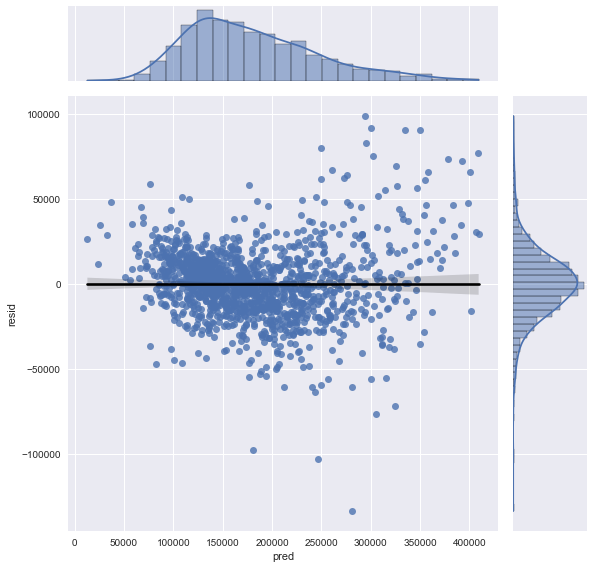

In [17]:
# CodeBlock Section 7b1
# Joint Plot.  Model 2
plt.style.use('seaborn')
plt.figure(figsize=(20,8))
sns.jointplot(y='resid', x='pred',kind='reg', data= X, ratio=5, height = 8, line_kws={'color': 'black'})

In [18]:
# CodeBlock Section 7b1
# Updating CorrMatrix Model 2
features = X
corrMatrix = features.corr()
df_corrMatrix = pd.DataFrame(corrMatrix)

In [19]:
# CodeBlock Section 7b1
# VIF Model 2
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,82497.8,const
39,481.9,pred
8,62.6,1st Floor Area
9,58.3,2nd Floor Area
2,24.1,Overall Quality
6,17.8,Basement Finished Area
4,17.1,Year Built
37,15.7,gf_Rough Finished
38,14.5,gf_Unfinished
36,11.2,gf_Finished


# CodeBlock Section 6b4 Explanation of the Results 
o Report the results for the model: 
§ R-Squared is 1.000
§ AIC is -5.638e+04and BIC is -5.616e+04
§ F-Statistic is 1.388e+30 and Prob (F-statistic) is 0.00
o Explain what you see.  Are there several features that should be excluded?  
Yes, all feature variables with p values greater than 0.50 should be excluded. 

Is there a lot of multi-collinearity? 

Yes, there is a lot of feature variables with a VIF score greater than 5.00 and have multi-collinearity.
 Is the model strong?
Based on the R squared and Adjusted R square, the model is strong. However there is multi-collinearity in a lot of feature variables that need to be excluded.

Did the model change much 
from the Initial Model to Model 2?

The R square changed from 0.913 to 1.000. The model is still strong but there is still multi-collinearity within the feature variables and need to be excluded. 


# Section 7c1
1. Create a code block to drop the feature in X with the highest p-value above 0.05.

In [20]:
# CodeBlock Section 7c1
# Model 3
X = X.drop(['1st Floor Area'], axis=1)

In [21]:
# CodeBlock Section 7c1
# Model 3
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.718e+30
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:16   Log-Likelihood:                 29562.
No. Observations:                1387   AIC:                        -5.904e+04
Df Residuals:                    1347   BIC:                        -5.883e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.328e-10   4.62e-10      0.504      0.614   -6.73e-10    1.14e-09
Lot Area                  -1.277e-15   4.48e-16     -2.849      0.004   -2.16e-15   -3.98e-16
Overall Quality           -1.273e-11   6.47e-12     -1.969      0.049   -2.54e-11   -4.62e-14
Overall Cond               3.865e-12   4.11e-12      0.942      0.347   -4.19e-12    1.19e-11
Year Built                         0   2.34e-13          0      1.000   -4.59e-13    4.59e-13
Masonry/Veneer Area        2.842e-14    2.6e-14      1.093      0.275   -2.26e-14    7.94e-14
Basement Finished Area    -2.753e-14   2.02e-14     -1.366      0.172   -6.71e-14     1.2e-14
Basement Unfinished Area  -1.243e-14   1.58e-14     -0.785      0.433   -4.35e-14    1.87e-14
2nd Floor Area             -2.22e-15   1.49e-14     -0.149      0.882   -3.15e-14    2.71e-14
Bedrooms Above Grade       1.819e-12   6.17e-12      0.295      0.768   -1.03e-11    1.39e-11
Kitchen Qual              -6.025e-12   9.03e-12     -0.668      0.505   -2.37e-11    1.17e-11
Fireplaces                -3.638e-12   7.29e-12     -0.499      0.618   -1.79e-11    1.07e-11
Garage Cars               -3.638e-12   9.55e-12     -0.381      0.703   -2.24e-11    1.51e-11
Porch Area                 1.776e-14   2.85e-14      0.622      0.534   -3.82e-14    7.38e-14
Extra Kitchens              1.41e-11   1.92e-11      0.733      0.463   -2.36e-11    5.18e-11
dt_1-STORY PUD             2.456e-11   1.92e-11      1.280      0.201   -1.31e-11    6.22e-11
dt_2-STORY PUD             4.729e-11   2.57e-11      1.841      0.066   -3.09e-12    9.77e-11
lc_Hillside                        0   2.14e-11          0      1.000   -4.19e-11    4.19e-11
nh_Briardale              -5.093e-11   4.16e-11     -1.223      0.221   -1.33e-10    3.07e-11
nh_Brookside               6.366e-12   2.13e-11      0.298      0.765   -3.55e-11    4.82e-11
nh_Crawford               -3.638e-11   2.36e-11     -1.542      0.123   -8.27e-11    9.91e-12
nh_Northpark Villa         5.457e-12   4.85e-11      0.113      0.910   -8.96e-11    1.01e-10
nh_Northridge             -4.366e-11   2.72e-11     -1.608      0.108   -9.69e-11    9.62e-12
nh_Northridge Heights      1.455e-11   2.32e-11      0.628      0.530   -3.09e-11       6e-11
nh_Northwest Ames         -1.319e-11   1.76e-11     -0.749      0.454   -4.77e-11    2.14e-11
nh_Somerset                3.638e-11   1.89e-11      1.929      0.054   -6.13e-13    7.34e-11
nh_Stone Brook             6.548e-11   3.42e-11      1.914      0.056   -1.62e-12    1.33e-10
nh_Veenker                 6.912e-11   4.34e-11      1.591      0.112   -1.61e-11    1.54e-10
locc_Adjacent Arterial St  1.637e-11   2.24e-11      0.731      0.465   -2.76e-11    6.03e-11
locc_Adjacent Feeder St       -1e-11   1.72e-11     -0.583      0.560   -4.

# Section 7c1 Model 3 Explanation:

Needed to drop 1st floor Area since p values was 0.891. It was above 0.050.

In [22]:
# CodeBlock Section 7c1
# Model 4
X = X.drop(['Overall Cond'], axis=1)

In [23]:
# CodeBlock Section 7c1
# Model 4
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.598e+30
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:16   Log-Likelihood:                 29275.
No. Observations:                1387   AIC:                        -5.847e+04
Df Residuals:                    1348   BIC:                        -5.827e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.164e-10   5.14e-10      0.226      0.821   -8.92e-10    1.12e-09
Lot Area                   1.388e-16   5.46e-16      0.254      0.800   -9.33e-16    1.21e-15
Overall Quality           -1.319e-11   7.94e-12     -1.661      0.097   -2.88e-11    2.38e-12
Year Built                -1.705e-13   2.66e-13     -0.642      0.521   -6.92e-13     3.5e-13
Masonry/Veneer Area       -6.395e-14   3.19e-14     -2.003      0.045   -1.27e-13   -1.31e-15
Basement Finished Area     3.819e-14   2.41e-14      1.587      0.113   -9.03e-15    8.54e-14
Basement Unfinished Area   1.776e-14   1.89e-14      0.941      0.347   -1.93e-14    5.48e-14
2nd Floor Area             2.487e-14    1.8e-14      1.381      0.167   -1.04e-14    6.02e-14
Bedrooms Above Grade      -7.276e-12   7.58e-12     -0.960      0.337   -2.21e-11    7.59e-12
Kitchen Qual              -3.638e-12   1.11e-11     -0.329      0.742   -2.53e-11    1.81e-11
Fireplaces                         0   8.85e-12          0      1.000   -1.74e-11    1.74e-11
Garage Cars                7.276e-12   1.15e-11      0.630      0.529   -1.54e-11    2.99e-11
Porch Area                -8.882e-15    3.5e-14     -0.254      0.800   -7.75e-14    5.98e-14
Extra Kitchens             9.095e-13   2.36e-11      0.039      0.969   -4.53e-11    4.71e-11
dt_1-STORY PUD             3.274e-11   2.36e-11      1.389      0.165   -1.35e-11     7.9e-11
dt_2-STORY PUD            -1.455e-11   3.15e-11     -0.462      0.644   -7.63e-11    4.72e-11
lc_Hillside               -2.365e-11   2.63e-11     -0.901      0.368   -7.52e-11    2.79e-11
nh_Briardale                2.91e-11   5.12e-11      0.569      0.570   -7.13e-11    1.29e-10
nh_Brookside               2.456e-11   2.62e-11      0.936      0.349   -2.69e-11     7.6e-11
nh_Crawford               -3.638e-11    2.9e-11     -1.254      0.210   -9.33e-11    2.05e-11
nh_Northpark Villa        -4.547e-11   5.96e-11     -0.763      0.445   -1.62e-10    7.14e-11
nh_Northridge              7.276e-12   3.32e-11      0.219      0.827   -5.79e-11    7.24e-11
nh_Northridge Heights              0    2.8e-11          0      1.000    -5.5e-11     5.5e-11
nh_Northwest Ames         -3.268e-12   2.15e-11     -0.152      0.879   -4.54e-11    3.88e-11
nh_Somerset               -1.455e-11   2.31e-11     -0.631      0.528   -5.98e-11    3.07e-11
nh_Stone Brook             1.164e-10   4.16e-11      2.798      0.005    3.48e-11    1.98e-10
nh_Veenker                -4.729e-11   5.34e-11     -0.886      0.376   -1.52e-10    5.75e-11
locc_Adjacent Arterial St -9.095e-12   2.75e-11     -0.330      0.741   -6.31e-11    4.49e-11
locc_Adjacent Feeder St    7.276e-12   2.11e-11      0.345      0.730   -3.41e-11    4.87e-11
locc_Adjacent Railroad     8.185e-12   2.89e-11      0.283      0.777   -4.

# Section 7c1 Model 4 Explanation:

Needed to drop Overall Cond since p values was 0.347. It was above 0.050.

In [24]:
# CodeBlock Section 7c1
# Model 5
X = X.drop(['Lot Area'], axis=1)

In [25]:
# CodeBlock Section 7c1
# Model 5
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.704e+30
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:16   Log-Likelihood:                 29363.
No. Observations:                1387   AIC:                        -5.865e+04
Df Residuals:                    1349   BIC:                        -5.845e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      5.821e-11   4.75e-10      0.123      0.902   -8.73e-10     9.9e-10
Overall Quality               -1e-11    7.1e-12     -1.410      0.159   -2.39e-11    3.91e-12
Year Built                -1.705e-13   2.46e-13     -0.693      0.488   -6.53e-13    3.12e-13
Masonry/Veneer Area       -4.263e-14   2.98e-14     -1.430      0.153   -1.01e-13    1.58e-14
Basement Finished Area      3.73e-14   2.19e-14      1.701      0.089   -5.71e-15    8.03e-14
Basement Unfinished Area   3.553e-15   1.74e-14      0.204      0.839   -3.06e-14    3.77e-14
2nd Floor Area             2.487e-14   1.64e-14      1.518      0.129   -7.28e-15     5.7e-14
Bedrooms Above Grade      -1.364e-12   7.11e-12     -0.192      0.848   -1.53e-11    1.26e-11
Kitchen Qual              -1.546e-11   1.02e-11     -1.521      0.129   -3.54e-11    4.48e-12
Fireplaces                 5.457e-12    8.3e-12      0.658      0.511   -1.08e-11    2.17e-11
Garage Cars               -1.455e-11   1.08e-11     -1.353      0.176   -3.56e-11    6.55e-12
Porch Area                -1.421e-14   3.26e-14     -0.436      0.663   -7.82e-14    4.98e-14
Extra Kitchens            -2.365e-11   2.21e-11     -1.072      0.284   -6.69e-11    1.96e-11
dt_1-STORY PUD             8.185e-12   2.21e-11      0.370      0.711   -3.52e-11    5.15e-11
dt_2-STORY PUD             1.091e-11   2.94e-11      0.371      0.710   -4.67e-11    6.86e-11
lc_Hillside                1.546e-11   2.46e-11      0.628      0.530   -3.28e-11    6.38e-11
nh_Briardale                       0    4.8e-11          0      1.000   -9.41e-11    9.41e-11
nh_Brookside               1.455e-11   2.45e-11      0.595      0.552   -3.34e-11    6.25e-11
nh_Crawford                2.183e-11   2.66e-11      0.820      0.413   -3.04e-11    7.41e-11
nh_Northpark Villa        -1.819e-11   5.58e-11     -0.326      0.744   -1.28e-10    9.13e-11
nh_Northridge             -6.185e-11   3.07e-11     -2.013      0.044   -1.22e-10   -1.58e-12
nh_Northridge Heights              0   2.57e-11          0      1.000   -5.04e-11    5.04e-11
nh_Northwest Ames          5.116e-12   2.01e-11      0.254      0.799   -3.44e-11    4.46e-11
nh_Somerset               -3.638e-11   2.15e-11     -1.689      0.091   -7.86e-11    5.88e-12
nh_Stone Brook             4.366e-11   3.84e-11      1.136      0.256   -3.18e-11    1.19e-10
nh_Veenker                -5.457e-11   4.99e-11     -1.093      0.275   -1.53e-10    4.34e-11
locc_Adjacent Arterial St  2.001e-11   2.58e-11      0.775      0.438   -3.06e-11    7.06e-11
locc_Adjacent Feeder St    2.638e-11   1.98e-11      1.333      0.183   -1.24e-11    6.52e-11
locc_Adjacent Railroad    -4.547e-12   2.71e-11     -0.168      0.867   -5.76e-11    4.86e-11
locc_Near Pos Feature     -7.276e-12   3.81e-11     -0.191      0.849   -8.

# Section 7c1 Model 5 Explanation:

Needed to drop Lot Area since p values was 0.800. It was above 0.050.

In [26]:
# CodeBlock Section 7c1
# Model 6
X = X.drop(['Overall Quality'], axis=1)

In [27]:
# CodeBlock Section 7c1
# Model 6
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.553e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:16   Log-Likelihood:                 30404.
No. Observations:                1387   AIC:                        -6.073e+04
Df Residuals:                    1350   BIC:                        -6.054e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.037e-09   2.24e-10      9.091      0.000     1.6e-09    2.48e-09
Year Built                -1.023e-12   1.16e-13     -8.821      0.000   -1.25e-12   -7.96e-13
Masonry/Veneer Area       -7.105e-14    1.4e-14     -5.059      0.000   -9.86e-14   -4.35e-14
Basement Finished Area    -2.442e-14   9.97e-15     -2.449      0.014    -4.4e-14   -4.86e-15
Basement Unfinished Area  -5.329e-15   8.21e-15     -0.649      0.517   -2.14e-14    1.08e-14
2nd Floor Area            -1.599e-14   7.71e-15     -2.074      0.038   -3.11e-14   -8.69e-16
Bedrooms Above Grade      -6.366e-12   3.35e-12     -1.900      0.058   -1.29e-11    2.05e-13
Kitchen Qual               1.091e-11    4.8e-12      2.274      0.023     1.5e-12    2.03e-11
Fireplaces                -7.276e-12    3.9e-12     -1.864      0.063   -1.49e-11    3.83e-13
Garage Cars               -1.819e-11   5.04e-12     -3.611      0.000   -2.81e-11   -8.31e-12
Porch Area                -1.776e-14   1.52e-14     -1.172      0.241   -4.75e-14     1.2e-14
Extra Kitchens            -2.274e-11   1.04e-11     -2.183      0.029   -4.32e-11    -2.3e-12
dt_1-STORY PUD             9.095e-13   1.01e-11      0.090      0.928    -1.9e-11    2.08e-11
dt_2-STORY PUD            -7.276e-12   1.36e-11     -0.534      0.594    -3.4e-11    1.95e-11
lc_Hillside                1.091e-11   1.16e-11      0.939      0.348   -1.19e-11    3.37e-11
nh_Briardale              -1.455e-11   2.26e-11     -0.643      0.520    -5.9e-11    2.99e-11
nh_Brookside              -3.092e-11   1.15e-11     -2.679      0.007   -5.36e-11   -8.28e-12
nh_Crawford               -3.638e-12   1.25e-11     -0.292      0.771   -2.81e-11    2.08e-11
nh_Northpark Villa          2.91e-11   2.63e-11      1.105      0.269   -2.26e-11    8.08e-11
nh_Northridge             -1.455e-11   1.44e-11     -1.014      0.311   -4.27e-11    1.36e-11
nh_Northridge Heights     -7.276e-12    1.2e-11     -0.605      0.545   -3.09e-11    1.63e-11
nh_Northwest Ames         -7.731e-12   9.48e-12     -0.815      0.415   -2.63e-11    1.09e-11
nh_Somerset                4.366e-11   1.02e-11      4.294      0.000    2.37e-11    6.36e-11
nh_Stone Brook            -5.093e-11   1.81e-11     -2.812      0.005   -8.65e-11   -1.54e-11
nh_Veenker                -1.019e-10   2.35e-11     -4.341      0.000   -1.48e-10   -5.58e-11
locc_Adjacent Arterial St  2.001e-11   1.21e-11      1.656      0.098    -3.7e-12    4.37e-11
locc_Adjacent Feeder St   -3.638e-12   9.33e-12     -0.390      0.697    -2.2e-11    1.47e-11
locc_Adjacent Railroad    -2.728e-12   1.28e-11     -0.214      0.831   -2.78e-11    2.23e-11
locc_Near Pos Feature      1.091e-11    1.8e-11      0.606      0.545   -2.44e-11    4.62e-11
sc_Abnormal Sale           4.547e-12   8.26e-12      0.551      0.582   -1.

# Section 7c1 Model 6 Explanation:

Needed to drop Overall Quality since p values was 0.159. It was above 0.050.

In [28]:
# CodeBlock Section 7c1
# Model 7
X = X.drop(['Basement Unfinished Area'], axis=1)

In [29]:
# CodeBlock Section 7c1
# Model 7
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.805e+30
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:16   Log-Likelihood:                 28834.
No. Observations:                1387   AIC:                        -5.760e+04
Df Residuals:                    1351   BIC:                        -5.741e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       2.91e-10   6.91e-10      0.421      0.674   -1.06e-09    1.65e-09
Year Built                -2.274e-13   3.58e-13     -0.636      0.525   -9.29e-13    4.74e-13
Masonry/Veneer Area       -9.237e-14   4.35e-14     -2.122      0.034   -1.78e-13   -6.98e-15
Basement Finished Area     8.882e-15   1.86e-14      0.476      0.634   -2.77e-14    4.55e-14
2nd Floor Area            -1.599e-14   1.98e-14     -0.806      0.420   -5.49e-14    2.29e-14
Bedrooms Above Grade       7.276e-12   1.02e-11      0.711      0.477   -1.28e-11    2.73e-11
Kitchen Qual              -7.049e-12   1.48e-11     -0.477      0.633    -3.6e-11    2.19e-11
Fireplaces                 1.455e-11   1.21e-11      1.207      0.228    -9.1e-12    3.82e-11
Garage Cars                1.455e-11   1.56e-11      0.934      0.351    -1.6e-11    4.51e-11
Porch Area                -2.842e-14   4.67e-14     -0.609      0.543    -1.2e-13    6.32e-14
Extra Kitchens            -4.547e-12    3.2e-11     -0.142      0.887   -6.73e-11    5.83e-11
dt_1-STORY PUD            -8.185e-12    3.1e-11     -0.264      0.792    -6.9e-11    5.26e-11
dt_2-STORY PUD            -2.547e-11   4.21e-11     -0.605      0.545   -1.08e-10    5.71e-11
lc_Hillside                1.728e-11   3.59e-11      0.481      0.631   -5.32e-11    8.78e-11
nh_Briardale              -1.455e-11   7.02e-11     -0.207      0.836   -1.52e-10    1.23e-10
nh_Brookside               3.183e-11   3.58e-11      0.890      0.374   -3.83e-11    1.02e-10
nh_Crawford                        0   3.84e-11          0      1.000   -7.53e-11    7.53e-11
nh_Northpark Villa          2.91e-11   8.16e-11      0.357      0.721   -1.31e-10    1.89e-10
nh_Northridge             -2.183e-11   4.44e-11     -0.491      0.623   -1.09e-10    6.54e-11
nh_Northridge Heights              0    3.7e-11          0      1.000   -7.26e-11    7.26e-11
nh_Northwest Ames         -8.754e-12   2.94e-11     -0.298      0.766   -6.64e-11    4.89e-11
nh_Somerset               -5.093e-11   3.15e-11     -1.618      0.106   -1.13e-10    1.08e-11
nh_Stone Brook             5.093e-11   5.58e-11      0.914      0.361   -5.84e-11     1.6e-10
nh_Veenker                 9.459e-11   7.22e-11      1.311      0.190    -4.7e-11    2.36e-10
locc_Adjacent Arterial St -5.457e-12   3.74e-11     -0.146      0.884   -7.89e-11     6.8e-11
locc_Adjacent Feeder St   -1.819e-11   2.89e-11     -0.629      0.530   -7.49e-11    3.86e-11
locc_Adjacent Railroad      2.91e-11   3.96e-11      0.735      0.462   -4.85e-11    1.07e-10
locc_Near Pos Feature     -7.276e-12   5.58e-11     -0.130      0.896   -1.17e-10    1.02e-10
sc_Abnormal Sale          -4.547e-12   2.55e-11     -0.178      0.859   -5.46e-11    4.55e-11
sc_Home not complete       2.365e-11   2.67e-11      0.887      0.375   -2.

# Section 7c1 Model 7 Explanation:

Needed to drop Basement Unfinished Area since p values was 0.517. It was above 0.050.

In [30]:
# CodeBlock Section 7c1
# Model 8
X = X.drop(['Year Built'], axis=1)

In [31]:
# CodeBlock Section 7c1
# Model 8
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.258e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:17   Log-Likelihood:                 29643.
No. Observations:                1387   AIC:                        -5.922e+04
Df Residuals:                    1352   BIC:                        -5.903e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -5.275e-11   2.75e-11     -1.916      0.056   -1.07e-10    1.27e-12
Masonry/Veneer Area        1.421e-14   2.43e-14      0.585      0.559   -3.34e-14    6.18e-14
Basement Finished Area    -4.086e-14   1.04e-14     -3.933      0.000   -6.12e-14   -2.05e-14
2nd Floor Area            -2.842e-14   1.09e-14     -2.610      0.009   -4.98e-14   -7.06e-15
Bedrooms Above Grade       3.729e-11   5.71e-12      6.534      0.000    2.61e-11    4.85e-11
Kitchen Qual              -1.819e-12   8.23e-12     -0.221      0.825    -1.8e-11    1.43e-11
Fireplaces                -1.819e-11   6.67e-12     -2.727      0.006   -3.13e-11    -5.1e-12
Garage Cars                 2.91e-11   8.63e-12      3.374      0.001    1.22e-11     4.6e-11
Porch Area                -4.263e-14   2.55e-14     -1.673      0.095   -9.26e-14    7.35e-15
Extra Kitchens             -9.55e-12   1.78e-11     -0.536      0.592   -4.45e-11    2.54e-11
dt_1-STORY PUD             2.183e-11    1.7e-11      1.287      0.198   -1.14e-11    5.51e-11
dt_2-STORY PUD             2.547e-11   2.28e-11      1.115      0.265   -1.93e-11    7.03e-11
lc_Hillside               -6.366e-12   2.01e-11     -0.317      0.751   -4.57e-11     3.3e-11
nh_Briardale               7.276e-12   3.91e-11      0.186      0.853   -6.95e-11    8.41e-11
nh_Brookside               1.091e-11   1.94e-11      0.561      0.575   -2.72e-11     4.9e-11
nh_Crawford               -2.183e-11   2.06e-11     -1.062      0.288   -6.21e-11    1.85e-11
nh_Northpark Villa         3.638e-12   4.55e-11      0.080      0.936   -8.56e-11    9.29e-11
nh_Northridge             -2.183e-11   2.48e-11     -0.881      0.379   -7.04e-11    2.68e-11
nh_Northridge Heights     -1.455e-11   2.05e-11     -0.709      0.478   -5.48e-11    2.57e-11
nh_Northwest Ames         -1.478e-11   1.64e-11     -0.901      0.368    -4.7e-11    1.74e-11
nh_Somerset               -7.276e-12   1.75e-11     -0.415      0.678   -4.17e-11    2.71e-11
nh_Stone Brook            -2.183e-11   3.09e-11     -0.707      0.480   -8.24e-11    3.88e-11
nh_Veenker                -4.366e-11   4.02e-11     -1.086      0.278   -1.23e-10    3.52e-11
locc_Adjacent Arterial St -1.273e-11   2.06e-11     -0.618      0.536   -5.31e-11    2.77e-11
locc_Adjacent Feeder St    8.185e-12   1.61e-11      0.508      0.612   -2.34e-11    3.98e-11
locc_Adjacent Railroad      1.91e-11    2.2e-11      0.868      0.386   -2.41e-11    6.23e-11
locc_Near Pos Feature      4.366e-11   3.11e-11      1.403      0.161   -1.74e-11    1.05e-10
sc_Abnormal Sale           3.456e-11   1.42e-11      2.431      0.015    6.68e-12    6.24e-11
sc_Home not complete       2.092e-11   1.49e-11      1.407      0.160   -8.25e-12    5.01e-11
sc_Sale within Family      1.637e-11   2.94e-11      0.557      0.578   -4.

# Section 7c1 Model 8 Explanation:

Needed to drop Year Built since p values was 0.525. It was above 0.050.

In [32]:
# CodeBlock Section 7c1
# Model 9
X = X.drop(['Masonry/Veneer Area'], axis=1)

In [33]:
# CodeBlock Section 7c1
# Model 9
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.233e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:17   Log-Likelihood:                 30463.
No. Observations:                1387   AIC:                        -6.086e+04
Df Residuals:                    1353   BIC:                        -6.068e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      4.729e-11   1.52e-11      3.109      0.002    1.74e-11    7.71e-11
Basement Finished Area      2.22e-14   5.75e-15      3.862      0.000    1.09e-14    3.35e-14
2nd Floor Area             8.882e-15   6.02e-15      1.476      0.140   -2.93e-15    2.07e-14
Bedrooms Above Grade       -3.82e-11   3.16e-12    -12.095      0.000   -4.44e-11    -3.2e-11
Kitchen Qual              -1.137e-11   4.52e-12     -2.514      0.012   -2.02e-11    -2.5e-12
Fireplaces                 1.273e-11   3.69e-12      3.449      0.001    5.49e-12       2e-11
Garage Cars                3.092e-11   4.77e-12      6.479      0.000    2.16e-11    4.03e-11
Porch Area                 4.263e-14   1.41e-14      3.031      0.002     1.5e-14    7.02e-14
Extra Kitchens            -6.821e-12   9.85e-12     -0.692      0.489   -2.61e-11    1.25e-11
dt_1-STORY PUD             -2.91e-11   9.38e-12     -3.102      0.002   -4.75e-11   -1.07e-11
dt_2-STORY PUD            -2.547e-11   1.26e-11     -2.025      0.043   -5.01e-11   -7.93e-13
lc_Hillside               -1.728e-11   1.11e-11     -1.557      0.120    -3.9e-11    4.49e-12
nh_Briardale                       0   2.14e-11          0      1.000   -4.21e-11    4.21e-11
nh_Brookside              -1.637e-11   1.08e-11     -1.522      0.128   -3.75e-11    4.72e-12
nh_Crawford               -3.638e-12   1.14e-11     -0.320      0.749   -2.59e-11    1.86e-11
nh_Northpark Villa         3.638e-12   2.51e-11      0.145      0.885   -4.57e-11    5.29e-11
nh_Northridge             -3.638e-12   1.35e-11     -0.269      0.788   -3.02e-11    2.29e-11
nh_Northridge Heights     -7.276e-12   1.13e-11     -0.646      0.518   -2.94e-11    1.48e-11
nh_Northwest Ames         -1.819e-12   9.02e-12     -0.202      0.840   -1.95e-11    1.59e-11
nh_Somerset                        0    9.7e-12          0      1.000    -1.9e-11     1.9e-11
nh_Stone Brook                     0   1.71e-11          0      1.000   -3.35e-11    3.35e-11
nh_Veenker                 1.019e-10   2.22e-11      4.592      0.000    5.83e-11    1.45e-10
locc_Adjacent Arterial St -3.183e-11   1.14e-11     -2.794      0.005   -5.42e-11   -9.48e-12
locc_Adjacent Feeder St    2.728e-12   8.91e-12      0.306      0.759   -1.47e-11    2.02e-11
locc_Adjacent Railroad     7.276e-12   1.22e-11      0.598      0.550   -1.66e-11    3.11e-11
locc_Near Pos Feature      1.091e-11   1.72e-11      0.634      0.526   -2.29e-11    4.47e-11
sc_Abnormal Sale          -2.365e-11   7.86e-12     -3.007      0.003   -3.91e-11   -8.22e-12
sc_Home not complete       -1.91e-11   8.22e-12     -2.323      0.020   -3.52e-11   -2.97e-12
sc_Sale within Family      1.364e-11   1.63e-11      0.839      0.402   -1.83e-11    4.55e-11
gf_Finished               -3.956e-11   1.32e-11     -2.988      0.003   -6.

# Section 7c1 Model 9 Explanation:

Needed to drop Masonry/Veneer Area since p values was 0.559. It was above 0.050.

In [34]:
# CodeBlock Section 7c1
# Model 10
X = X.drop(['2nd Floor Area'], axis=1)

In [35]:
# CodeBlock Section 7c1
# Model 10
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.957e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:17   Log-Likelihood:                 30193.
No. Observations:                1387   AIC:                        -6.032e+04
Df Residuals:                    1354   BIC:                        -6.015e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      6.139e-11   1.79e-11      3.432      0.001    2.63e-11    9.65e-11
Basement Finished Area     5.329e-15   6.55e-15      0.814      0.416   -7.51e-15    1.82e-14
Bedrooms Above Grade      -2.319e-11   3.62e-12     -6.413      0.000   -3.03e-11   -1.61e-11
Kitchen Qual              -1.478e-11   5.49e-12     -2.694      0.007   -2.55e-11   -4.02e-12
Fireplaces                -1.455e-11   4.48e-12     -3.245      0.001   -2.33e-11   -5.75e-12
Garage Cars                9.095e-12   5.77e-12      1.578      0.115   -2.21e-12    2.04e-11
Porch Area                 3.197e-14   1.71e-14      1.871      0.061   -1.54e-15    6.55e-14
Extra Kitchens            -1.819e-11   1.19e-11     -1.523      0.128   -4.16e-11    5.25e-12
dt_1-STORY PUD              7.64e-11   1.14e-11      6.702      0.000     5.4e-11    9.88e-11
dt_2-STORY PUD            -7.276e-12   1.47e-11     -0.494      0.622   -3.62e-11    2.16e-11
lc_Hillside                1.273e-11   1.35e-11      0.945      0.345   -1.37e-11    3.92e-11
nh_Briardale               6.548e-11   2.61e-11      2.513      0.012    1.44e-11    1.17e-10
nh_Brookside               2.365e-11   1.31e-11      1.812      0.070   -1.95e-12    4.92e-11
nh_Crawford               -1.455e-11   1.38e-11     -1.055      0.292   -4.16e-11    1.25e-11
nh_Northpark Villa        -1.091e-11   3.05e-11     -0.358      0.721   -7.08e-11     4.9e-11
nh_Northridge              -2.91e-11   1.64e-11     -1.771      0.077   -6.13e-11    3.13e-12
nh_Northridge Heights     -4.366e-11   1.36e-11     -3.221      0.001   -7.02e-11   -1.71e-11
nh_Northwest Ames          3.092e-11    1.1e-11      2.821      0.005    9.42e-12    5.24e-11
nh_Somerset               -7.276e-12   1.18e-11     -0.618      0.537   -3.04e-11    1.58e-11
nh_Stone Brook             1.455e-11   2.07e-11      0.703      0.482   -2.61e-11    5.52e-11
nh_Veenker                -4.366e-11   2.69e-11     -1.622      0.105   -9.65e-11    9.14e-12
locc_Adjacent Arterial St  2.274e-11   1.38e-11      1.652      0.099   -4.26e-12    4.97e-11
locc_Adjacent Feeder St   -2.728e-12   1.08e-11     -0.252      0.801   -2.39e-11    1.85e-11
locc_Adjacent Railroad    -2.819e-11   1.48e-11     -1.908      0.057   -5.72e-11    7.93e-13
locc_Near Pos Feature     -4.002e-11   2.09e-11     -1.913      0.056   -8.11e-11    1.03e-12
sc_Abnormal Sale           5.457e-12   9.55e-12      0.571      0.568   -1.33e-11    2.42e-11
sc_Home not complete       9.095e-12   9.92e-12      0.917      0.359   -1.04e-11    2.86e-11
sc_Sale within Family     -7.276e-12   1.97e-11     -0.369      0.712    -4.6e-11    3.14e-11
gf_Finished                    1e-11   1.61e-11      0.623      0.533   -2.15e-11    4.15e-11
gf_Rough Finished          1.455e-11   1.54e-11      0.946      0.344   -1.

# Section 7c1 Model 10 Explanation:

Needed to drop 2nd Floor Area since p value was above 0.050.

In [36]:
# CodeBlock Section 7c1
# Model 11
X = X.drop(['Basement Finished Area'], axis=1)

In [37]:
# CodeBlock Section 7c1
# Model 11
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.090e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:17   Log-Likelihood:                 30547.
No. Observations:                1387   AIC:                        -6.103e+04
Df Residuals:                    1355   BIC:                        -6.086e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       7.64e-11   1.38e-11      5.554      0.000    4.94e-11    1.03e-10
Bedrooms Above Grade      -4.366e-11   2.68e-12    -16.303      0.000   -4.89e-11   -3.84e-11
Kitchen Qual              -4.093e-11   4.18e-12     -9.796      0.000   -4.91e-11   -3.27e-11
Fireplaces                 9.095e-12   3.47e-12      2.622      0.009    2.29e-12    1.59e-11
Garage Cars               -1.091e-11   4.41e-12     -2.473      0.014   -1.96e-11   -2.25e-12
Porch Area                -8.171e-14   1.32e-14     -6.190      0.000   -1.08e-13   -5.58e-14
Extra Kitchens             2.956e-11   9.24e-12      3.198      0.001    1.14e-11    4.77e-11
dt_1-STORY PUD             2.547e-11   8.82e-12      2.888      0.004    8.17e-12    4.28e-11
dt_2-STORY PUD             1.819e-11   1.14e-11      1.595      0.111   -4.18e-12    4.06e-11
lc_Hillside               -1.091e-11   1.04e-11     -1.047      0.295   -3.14e-11    9.53e-12
nh_Briardale              -1.455e-11   2.02e-11     -0.722      0.471   -5.41e-11     2.5e-11
nh_Brookside              -1.819e-11   1.01e-11     -1.807      0.071   -3.79e-11    1.56e-12
nh_Crawford               -3.638e-12   1.06e-11     -0.343      0.732   -2.45e-11    1.72e-11
nh_Northpark Villa        -6.912e-11   2.36e-11     -2.925      0.004   -1.15e-10   -2.28e-11
nh_Northridge              -2.91e-11   1.27e-11     -2.296      0.022    -5.4e-11   -4.24e-12
nh_Northridge Heights      1.455e-11   1.04e-11      1.399      0.162   -5.86e-12     3.5e-11
nh_Northwest Ames          9.095e-12   8.49e-12      1.072      0.284   -7.55e-12    2.57e-11
nh_Somerset                -2.91e-11      9e-12     -3.234      0.001   -4.68e-11   -1.14e-11
nh_Stone Brook            -4.366e-11    1.6e-11     -2.728      0.006    -7.5e-11   -1.23e-11
nh_Veenker                 2.183e-11   2.08e-11      1.048      0.295    -1.9e-11    6.27e-11
locc_Adjacent Arterial St -9.095e-13   1.07e-11     -0.085      0.932   -2.18e-11       2e-11
locc_Adjacent Feeder St    8.185e-12   8.34e-12      0.981      0.327   -8.18e-12    2.45e-11
locc_Adjacent Railroad     5.457e-12   1.14e-11      0.477      0.633    -1.7e-11    2.79e-11
locc_Near Pos Feature     -3.274e-11   1.62e-11     -2.021      0.043   -6.45e-11   -9.62e-13
sc_Abnormal Sale           2.638e-11   7.39e-12      3.571      0.000    1.19e-11    4.09e-11
sc_Home not complete      -3.865e-11   7.56e-12     -5.113      0.000   -5.35e-11   -2.38e-11
sc_Sale within Family     -2.456e-11   1.53e-11     -1.609      0.108   -5.45e-11    5.38e-12
gf_Finished                2.365e-11   1.24e-11      1.904      0.057   -7.16e-13     4.8e-11
gf_Rough Finished         -1.273e-11   1.19e-11     -1.071      0.284   -3.61e-11    1.06e-11
gf_Unfinished              1.364e-11   1.11e-11      1.229      0.219   -8.

# Section 7c1 Model 11 Explanation:

Needed to drop Basement Finished Area since p value was above 0.050.

In [38]:
# CodeBlock Section 7c1
# Model 13
X = X.drop(['dt_2-STORY PUD'], axis=1)

In [39]:
# CodeBlock Section 7c1
# Model 13
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.526e+30
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:17   Log-Likelihood:                 29198.
No. Observations:                1387   AIC:                        -5.833e+04
Df Residuals:                    1356   BIC:                        -5.817e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1.455e-10   3.63e-11     -4.014      0.000   -2.17e-10   -7.44e-11
Bedrooms Above Grade       2.365e-11   7.08e-12      3.341      0.001    9.76e-12    3.75e-11
Kitchen Qual               3.251e-11    1.1e-11      2.964      0.003     1.1e-11     5.4e-11
Fireplaces                 3.456e-11   9.16e-12      3.774      0.000    1.66e-11    5.25e-11
Garage Cars               -4.911e-11   1.16e-11     -4.218      0.000    -7.2e-11   -2.63e-11
Porch Area                -8.527e-14   3.49e-14     -2.443      0.015   -1.54e-13   -1.68e-14
Extra Kitchens            -5.912e-12   2.44e-11     -0.242      0.809   -5.38e-11     4.2e-11
dt_1-STORY PUD            -3.729e-11    2.3e-11     -1.620      0.105   -8.24e-11    7.87e-12
lc_Hillside                5.457e-12   2.75e-11      0.198      0.843   -4.86e-11    5.95e-11
nh_Briardale               7.276e-12   4.52e-11      0.161      0.872   -8.14e-11    9.59e-11
nh_Brookside               1.455e-11   2.66e-11      0.547      0.584   -3.76e-11    6.67e-11
nh_Crawford               -8.731e-11   2.81e-11     -3.111      0.002   -1.42e-10   -3.23e-11
nh_Northpark Villa          2.91e-11   6.02e-11      0.484      0.629   -8.89e-11    1.47e-10
nh_Northridge              1.819e-11   3.34e-11      0.545      0.586   -4.73e-11    8.36e-11
nh_Northridge Heights      3.638e-12    2.7e-11      0.135      0.893   -4.93e-11    5.65e-11
nh_Northwest Ames          1.728e-11   2.24e-11      0.770      0.441   -2.67e-11    6.13e-11
nh_Somerset               -1.455e-11    2.2e-11     -0.662      0.508   -5.77e-11    2.86e-11
nh_Stone Brook             2.183e-11   4.17e-11      0.523      0.601      -6e-11    1.04e-10
nh_Veenker                 3.638e-11    5.5e-11      0.661      0.509   -7.16e-11    1.44e-10
locc_Adjacent Arterial St -2.183e-11   2.81e-11     -0.776      0.438    -7.7e-11    3.34e-11
locc_Adjacent Feeder St   -6.366e-12    2.2e-11     -0.289      0.772   -4.95e-11    3.68e-11
locc_Adjacent Railroad     1.182e-11   3.02e-11      0.391      0.696   -4.74e-11    7.11e-11
locc_Near Pos Feature      4.002e-11   4.28e-11      0.934      0.350    -4.4e-11    1.24e-10
sc_Abnormal Sale          -1.091e-11   1.95e-11     -0.559      0.576   -4.92e-11    2.74e-11
sc_Home not complete       7.958e-12   1.99e-11      0.399      0.690   -3.11e-11    4.71e-11
sc_Sale within Family     -8.185e-12   4.03e-11     -0.203      0.839   -8.73e-11    7.09e-11
gf_Finished               -8.185e-12   3.28e-11     -0.249      0.803   -7.26e-11    5.62e-11
gf_Rough Finished         -1.637e-11   3.14e-11     -0.521      0.602    -7.8e-11    4.53e-11
gf_Unfinished             -4.093e-11   2.93e-11     -1.395      0.163   -9.85e-11    1.66e-11
pred                          1.0000   1.83e-16   5.47e+15      0.000      

# Section 7c1 Model 13 Explanation:

Needed to drop dt_2-STORY PUD since p value was above 0.050.

In [40]:
# CodeBlock Section 7c1
# Model 14
X = X.drop(['Extra Kitchens'], axis=1)

In [41]:
# CodeBlock Section 7c1
# Model 14
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.550e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:17   Log-Likelihood:                 29675.
No. Observations:                1387   AIC:                        -5.929e+04
Df Residuals:                    1357   BIC:                        -5.913e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1.164e-10   2.56e-11     -4.549      0.000   -1.67e-10   -6.62e-11
Bedrooms Above Grade       3.729e-11   4.88e-12      7.636      0.000    2.77e-11    4.69e-11
Kitchen Qual               3.979e-11   7.77e-12      5.120      0.000    2.45e-11     5.5e-11
Fireplaces                 2.547e-11   6.49e-12      3.925      0.000    1.27e-11    3.82e-11
Garage Cars                3.638e-12   8.13e-12      0.447      0.655   -1.23e-11    1.96e-11
Porch Area                 4.263e-14   2.47e-14      1.724      0.085   -5.87e-15    9.11e-14
dt_1-STORY PUD            -1.819e-11   1.63e-11     -1.117      0.264   -5.01e-11    1.37e-11
lc_Hillside                4.184e-11   1.95e-11      2.144      0.032    3.55e-12    8.01e-11
nh_Briardale               1.273e-11    3.2e-11      0.398      0.691   -5.01e-11    7.55e-11
nh_Brookside              -1.819e-12   1.88e-11     -0.097      0.923   -3.87e-11    3.51e-11
nh_Crawford                3.274e-11   1.99e-11      1.648      0.100   -6.24e-12    7.17e-11
nh_Northpark Villa        -9.277e-11   4.26e-11     -2.177      0.030   -1.76e-10   -9.17e-12
nh_Northridge              6.185e-11   2.36e-11      2.616      0.009    1.55e-11    1.08e-10
nh_Northridge Heights       2.91e-11   1.91e-11      1.523      0.128   -8.38e-12    6.66e-11
nh_Northwest Ames          2.183e-11   1.59e-11      1.373      0.170   -9.35e-12     5.3e-11
nh_Somerset                6.185e-11   1.56e-11      3.969      0.000    3.13e-11    9.24e-11
nh_Stone Brook             1.019e-10   2.96e-11      3.447      0.001    4.39e-11     1.6e-10
nh_Veenker                 6.548e-11    3.9e-11      1.679      0.093    -1.1e-11    1.42e-10
locc_Adjacent Arterial St -2.274e-11   1.99e-11     -1.140      0.254   -6.18e-11    1.64e-11
locc_Adjacent Feeder St    -1.91e-11   1.56e-11     -1.228      0.220   -4.96e-11    1.14e-11
locc_Adjacent Railroad    -2.092e-11   2.14e-11     -0.978      0.328   -6.29e-11     2.1e-11
locc_Near Pos Feature      2.183e-11   3.04e-11      0.719      0.472   -3.77e-11    8.14e-11
sc_Abnormal Sale           5.457e-12   1.38e-11      0.395      0.693   -2.17e-11    3.26e-11
sc_Home not complete       3.615e-11   1.41e-11      2.561      0.011    8.46e-12    6.38e-11
sc_Sale within Family     -6.366e-12   2.86e-11     -0.223      0.824   -6.24e-11    4.97e-11
gf_Finished               -2.774e-11   2.28e-11     -1.219      0.223   -7.24e-11    1.69e-11
gf_Rough Finished         -8.004e-11   2.17e-11     -3.681      0.000   -1.23e-10   -3.74e-11
gf_Unfinished                      0   2.04e-11          0      1.000      -4e-11       4e-11
pred                          1.0000   1.29e-16   7.76e+15      0.000       1.000       1.000
resid                         1.0000    1.6e-16   6.26e+15      0.000      

# Section 7c1 Model 14 Explanation:

Needed to drop Extra Kitchens since p value was above 0.050.

In [42]:
# CodeBlock Section 7c1
# Model 15
X = X.drop(['Garage Cars'], axis=1)

In [43]:
# CodeBlock Section 7c1
# Model 15
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.069e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:17   Log-Likelihood:                 29393.
No. Observations:                1387   AIC:                        -5.873e+04
Df Residuals:                    1358   BIC:                        -5.858e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.728e-11   3.07e-11      0.890      0.374   -3.29e-11    8.75e-11
Bedrooms Above Grade      -2.728e-11   5.98e-12     -4.562      0.000    -3.9e-11   -1.56e-11
Kitchen Qual               2.547e-11   9.52e-12      2.675      0.008    6.79e-12    4.41e-11
Fireplaces                 4.729e-11   7.91e-12      5.982      0.000    3.18e-11    6.28e-11
Porch Area                  6.75e-14   3.01e-14      2.242      0.025    8.43e-15    1.27e-13
dt_1-STORY PUD            -6.548e-11   1.99e-11     -3.286      0.001   -1.05e-10   -2.64e-11
lc_Hillside                1.091e-11   2.39e-11      0.457      0.648    -3.6e-11    5.78e-11
nh_Briardale               2.001e-11   3.92e-11      0.511      0.610   -5.69e-11    9.69e-11
nh_Brookside               4.184e-11    2.3e-11      1.816      0.070   -3.36e-12     8.7e-11
nh_Crawford               -1.819e-11    2.4e-11     -0.757      0.449   -6.53e-11    2.89e-11
nh_Northpark Villa         3.638e-11   5.21e-11      0.699      0.485   -6.58e-11    1.39e-10
nh_Northridge              7.276e-12    2.9e-11      0.251      0.802   -4.95e-11    6.41e-11
nh_Northridge Heights      5.821e-11   2.34e-11      2.487      0.013    1.23e-11    1.04e-10
nh_Northwest Ames          8.185e-12   1.94e-11      0.421      0.673   -2.99e-11    4.63e-11
nh_Somerset                5.821e-11   1.91e-11      3.051      0.002    2.08e-11    9.56e-11
nh_Stone Brook            -1.455e-11   3.61e-11     -0.403      0.687   -8.54e-11    5.63e-11
nh_Veenker                -7.276e-12   4.78e-11     -0.152      0.879   -1.01e-10    8.64e-11
locc_Adjacent Arterial St -9.095e-12   2.44e-11     -0.372      0.710    -5.7e-11    3.88e-11
locc_Adjacent Feeder St   -1.364e-11    1.9e-11     -0.717      0.473    -5.1e-11    2.37e-11
locc_Adjacent Railroad     3.092e-11   2.62e-11      1.181      0.238   -2.04e-11    8.23e-11
locc_Near Pos Feature     -1.819e-11   3.72e-11     -0.489      0.625   -9.11e-11    5.48e-11
sc_Abnormal Sale          -4.184e-11   1.69e-11     -2.471      0.014    -7.5e-11   -8.63e-12
sc_Home not complete      -6.139e-12   1.73e-11     -0.355      0.723   -4.01e-11    2.78e-11
sc_Sale within Family      1.728e-11    3.5e-11      0.494      0.621   -5.13e-11    8.59e-11
gf_Finished                1.455e-11    2.4e-11      0.606      0.544   -3.25e-11    6.16e-11
gf_Rough Finished         -2.092e-11   2.26e-11     -0.926      0.354   -6.52e-11    2.34e-11
gf_Unfinished             -1.091e-11   2.09e-11     -0.522      0.602    -5.2e-11    3.01e-11
pred                          1.0000   1.41e-16   7.08e+15      0.000       1.000       1.000
resid                         1.0000   1.96e-16   5.11e+15      0.000       1.000       1.000
===========================================================================

# Section 7c1 Model 15 Explanation:

Needed to drop Garage Cars since p value was above 0.050.

In [44]:
# CodeBlock Section 7c1
# Model 16
X = X.drop(['lc_Hillside'], axis=1)

In [45]:
# CodeBlock Section 7c1
# Model 16
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.110e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:17   Log-Likelihood:                 30301.
No. Observations:                1387   AIC:                        -6.055e+04
Df Residuals:                    1359   BIC:                        -6.040e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -6.003e-11   1.59e-11     -3.769      0.000   -9.13e-11   -2.88e-11
Bedrooms Above Grade      -5.912e-11   3.11e-12    -19.039      0.000   -6.52e-11    -5.3e-11
Kitchen Qual               5.002e-11   4.92e-12     10.157      0.000    4.04e-11    5.97e-11
Fireplaces                 1.637e-11    4.1e-12      3.989      0.000    8.32e-12    2.44e-11
Porch Area                 1.208e-13   1.56e-14      7.732      0.000    9.01e-14    1.51e-13
dt_1-STORY PUD            -3.092e-11   1.03e-11     -2.990      0.003   -5.12e-11   -1.06e-11
nh_Briardale               4.911e-11   2.04e-11      2.413      0.016    9.18e-12     8.9e-11
nh_Brookside               1.819e-11    1.2e-11      1.520      0.129   -5.28e-12    4.17e-11
nh_Crawford                        0   1.23e-11          0      1.000   -2.41e-11    2.41e-11
nh_Northpark Villa         1.819e-11    2.7e-11      0.673      0.501   -3.49e-11    7.12e-11
nh_Northridge             -7.276e-12    1.5e-11     -0.486      0.627   -3.67e-11    2.21e-11
nh_Northridge Heights     -3.638e-11   1.21e-11     -3.017      0.003      -6e-11   -1.27e-11
nh_Northwest Ames         -3.729e-11   1.01e-11     -3.700      0.000   -5.71e-11   -1.75e-11
nh_Somerset               -7.276e-12   9.86e-12     -0.738      0.461   -2.66e-11    1.21e-11
nh_Stone Brook             6.548e-11   1.87e-11      3.499      0.000    2.88e-11    1.02e-10
nh_Veenker                 5.457e-11   2.48e-11      2.201      0.028    5.94e-12    1.03e-10
locc_Adjacent Arterial St -3.001e-11   1.27e-11     -2.366      0.018   -5.49e-11   -5.13e-12
locc_Adjacent Feeder St   -1.364e-11   9.88e-12     -1.380      0.168    -3.3e-11    5.74e-12
locc_Adjacent Railroad     2.365e-11   1.36e-11      1.739      0.082   -3.02e-12    5.03e-11
locc_Near Pos Feature      4.002e-11   1.93e-11      2.073      0.038    2.14e-12    7.79e-11
sc_Abnormal Sale          -7.276e-12   8.79e-12     -0.827      0.408   -2.45e-11    9.97e-12
sc_Home not complete       4.138e-11   8.96e-12      4.618      0.000    2.38e-11     5.9e-11
sc_Sale within Family      1.091e-11   1.81e-11      0.601      0.548   -2.47e-11    4.65e-11
gf_Finished               -3.638e-11   1.25e-11     -2.920      0.004   -6.08e-11   -1.19e-11
gf_Rough Finished         -1.364e-11   1.17e-11     -1.164      0.245   -3.66e-11    9.36e-12
gf_Unfinished              1.728e-11   1.09e-11      1.591      0.112   -4.02e-12    3.86e-11
pred                          1.0000   7.25e-17   1.38e+16      0.000       1.000       1.000
resid                         1.0000   1.02e-16   9.83e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      100.694   Durbin-Watson:                   2.070
Prob(Omnibu

# Section 7c1 Model 16 Explanation:

Needed to drop lc_Hillside since p value was above 0.050.

In [46]:
# CodeBlock Section 7c1
# Model 17
X = X.drop(['nh_Brookside'], axis=1)

In [47]:
# CodeBlock Section 7c1
# Model 17
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.012e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:17   Log-Likelihood:                 30412.
No. Observations:                1387   AIC:                        -6.077e+04
Df Residuals:                    1360   BIC:                        -6.063e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -7.094e-11   1.45e-11     -4.890      0.000   -9.94e-11   -4.25e-11
Bedrooms Above Grade      -1.546e-11   2.86e-12     -5.406      0.000   -2.11e-11   -9.85e-12
Kitchen Qual               1.069e-11   4.54e-12      2.356      0.019    1.79e-12    1.96e-11
Fireplaces                 1.819e-11   3.79e-12      4.806      0.000    1.08e-11    2.56e-11
Porch Area                  9.77e-14   1.44e-14      6.778      0.000    6.94e-14    1.26e-13
dt_1-STORY PUD            -9.095e-12   9.54e-12     -0.953      0.341   -2.78e-11    9.62e-12
nh_Briardale               6.003e-11   1.88e-11      3.199      0.001    2.32e-11    9.68e-11
nh_Crawford               -2.183e-11   1.13e-11     -1.929      0.054    -4.4e-11    3.65e-13
nh_Northpark Villa         -3.82e-11   2.49e-11     -1.531      0.126   -8.71e-11    1.07e-11
nh_Northridge              6.548e-11   1.38e-11      4.738      0.000    3.84e-11    9.26e-11
nh_Northridge Heights      5.821e-11   1.11e-11      5.231      0.000    3.64e-11       8e-11
nh_Northwest Ames           6.73e-11   9.28e-12      7.250      0.000    4.91e-11    8.55e-11
nh_Somerset                5.821e-11   9.09e-12      6.401      0.000    4.04e-11     7.6e-11
nh_Stone Brook             6.548e-11   1.73e-11      3.792      0.000    3.16e-11    9.94e-11
nh_Veenker                 -7.64e-11   2.29e-11     -3.340      0.001   -1.21e-10   -3.15e-11
locc_Adjacent Arterial St -3.547e-11   1.17e-11     -3.033      0.002   -5.84e-11   -1.25e-11
locc_Adjacent Feeder St    9.095e-12   9.12e-12      0.997      0.319   -8.79e-12     2.7e-11
locc_Adjacent Railroad    -2.274e-11   1.25e-11     -1.826      0.068   -4.72e-11    1.69e-12
locc_Near Pos Feature     -4.184e-11   1.78e-11     -2.349      0.019   -7.68e-11    -6.9e-12
sc_Abnormal Sale           9.095e-12   8.11e-12      1.121      0.262   -6.82e-12     2.5e-11
sc_Home not complete       5.048e-11   8.27e-12      6.105      0.000    3.43e-11    6.67e-11
sc_Sale within Family     -4.275e-11   1.67e-11     -2.553      0.011   -7.56e-11    -9.9e-12
gf_Finished               -1.637e-11   1.15e-11     -1.430      0.153   -3.88e-11    6.09e-12
gf_Rough Finished          1.364e-11   1.08e-11      1.266      0.206   -7.49e-12    3.48e-11
gf_Unfinished             -1.182e-11      1e-11     -1.181      0.238   -3.15e-11    7.81e-12
pred                          1.0000   6.69e-17    1.5e+16      0.000       1.000       1.000
resid                         1.0000   9.39e-17   1.07e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      125.159   Durbin-Watson:                   1.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.622
Skew:                     

# Section 7c1 Model 17 Explanation:

Needed to drop nh_Brookside since p value was above 0.050.

In [48]:
# CodeBlock Section 7c1
# Model 18
X = X.drop(['dt_1-STORY PUD'], axis=1)

In [49]:
# CodeBlock Section 7c1
# Model 18
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.791e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:17   Log-Likelihood:                 30595.
No. Observations:                1387   AIC:                        -6.114e+04
Df Residuals:                    1361   BIC:                        -6.100e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -3.638e-12   1.25e-11     -0.291      0.771   -2.82e-11    2.09e-11
Bedrooms Above Grade      -3.274e-11   2.39e-12    -13.674      0.000   -3.74e-11    -2.8e-11
Kitchen Qual               5.491e-11   3.94e-12     13.928      0.000    4.72e-11    6.26e-11
Fireplaces                -1.273e-11   3.31e-12     -3.846      0.000   -1.92e-11   -6.24e-12
Porch Area                 8.882e-14   1.26e-14      7.046      0.000    6.41e-14    1.14e-13
nh_Briardale              -3.092e-11   1.64e-11     -1.882      0.060   -6.32e-11    1.31e-12
nh_Crawford               -4.002e-11   9.89e-12     -4.046      0.000   -5.94e-11   -2.06e-11
nh_Northpark Villa         5.821e-11   2.16e-11      2.691      0.007    1.58e-11    1.01e-10
nh_Northridge             -2.183e-11   1.21e-11     -1.804      0.071   -4.56e-11     1.9e-12
nh_Northridge Heights      8.731e-11   9.55e-12      9.142      0.000    6.86e-11    1.06e-10
nh_Northwest Ames         -2.092e-11   8.13e-12     -2.572      0.010   -3.69e-11   -4.96e-12
nh_Somerset                1.819e-11   7.97e-12      2.283      0.023    2.56e-12    3.38e-11
nh_Stone Brook            -1.091e-10   1.47e-11     -7.410      0.000   -1.38e-10   -8.02e-11
nh_Veenker                -1.819e-11      2e-11     -0.910      0.363   -5.74e-11     2.1e-11
locc_Adjacent Arterial St -2.638e-11   1.02e-11     -2.575      0.010   -4.65e-11   -6.28e-12
locc_Adjacent Feeder St   -9.095e-13   7.99e-12     -0.114      0.909   -1.66e-11    1.48e-11
locc_Adjacent Railroad         1e-11   1.09e-11      0.917      0.359   -1.14e-11    3.14e-11
locc_Near Pos Feature      4.002e-11   1.56e-11      2.565      0.010    9.41e-12    7.06e-11
sc_Abnormal Sale           5.457e-12   7.11e-12      0.768      0.443   -8.48e-12    1.94e-11
sc_Home not complete      -6.548e-11   7.24e-12     -9.042      0.000   -7.97e-11   -5.13e-11
sc_Sale within Family     -1.546e-11   1.47e-11     -1.054      0.292   -4.42e-11    1.33e-11
gf_Finished               -9.641e-11   9.99e-12     -9.651      0.000   -1.16e-10   -7.68e-11
gf_Rough Finished          -6.73e-11   9.42e-12     -7.146      0.000   -8.58e-11   -4.88e-11
gf_Unfinished             -6.366e-11   8.77e-12     -7.260      0.000   -8.09e-11   -4.65e-11
pred                          1.0000   5.78e-17   1.73e+16      0.000       1.000       1.000
resid                         1.0000   8.22e-17   1.22e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      154.166   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.998
Skew:                          -0.774   Prob(JB):                     3.82e-54
Kurtosis:                       4.365   C

# Section 7c1 Model 18 Explanation:

Needed to drop dt_1-STORY PUD since p value was above 0.050.

In [50]:
# CodeBlock Section 7c1
# Model 19
X = X.drop(['nh_Briardale'], axis=1)

In [51]:
# CodeBlock Section 7c1
# Model 19
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.177e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:17   Log-Likelihood:                 30378.
No. Observations:                1387   AIC:                        -6.071e+04
Df Residuals:                    1362   BIC:                        -6.057e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -2.001e-11   1.46e-11     -1.372      0.170   -4.86e-11    8.61e-12
Bedrooms Above Grade       1.637e-11    2.8e-12      5.852      0.000    1.09e-11    2.19e-11
Kitchen Qual               8.868e-12   4.61e-12      1.924      0.055   -1.73e-13    1.79e-11
Fireplaces                 2.183e-11   3.87e-12      5.643      0.000    1.42e-11    2.94e-11
Porch Area                 4.086e-14   1.47e-14      2.774      0.006     1.2e-14    6.98e-14
nh_Crawford               -5.457e-11   1.16e-11     -4.721      0.000   -7.72e-11   -3.19e-11
nh_Northpark Villa         5.457e-12   2.53e-11      0.216      0.829   -4.41e-11     5.5e-11
nh_Northridge              1.455e-11   1.41e-11      1.029      0.304   -1.32e-11    4.23e-11
nh_Northridge Heights      5.457e-11   1.12e-11      4.889      0.000    3.27e-11    7.65e-11
nh_Northwest Ames         -9.095e-13   9.51e-12     -0.096      0.924   -1.96e-11    1.77e-11
nh_Somerset                6.185e-11   9.31e-12      6.642      0.000    4.36e-11    8.01e-11
nh_Stone Brook             5.093e-11   1.72e-11      2.958      0.003    1.72e-11    8.47e-11
nh_Veenker                -9.095e-11   2.34e-11     -3.893      0.000   -1.37e-10   -4.51e-11
locc_Adjacent Arterial St -1.728e-11    1.2e-11     -1.445      0.149   -4.07e-11    6.19e-12
locc_Adjacent Feeder St   -4.547e-11   9.33e-12     -4.875      0.000   -6.38e-11   -2.72e-11
locc_Adjacent Railroad     1.091e-11   1.27e-11      0.856      0.392   -1.41e-11    3.59e-11
locc_Near Pos Feature      -3.82e-11   1.82e-11     -2.095      0.036    -7.4e-11   -2.42e-12
sc_Abnormal Sale           7.276e-12    8.3e-12      0.877      0.381   -9.01e-12    2.36e-11
sc_Home not complete      -6.139e-12   8.47e-12     -0.725      0.468   -2.27e-11    1.05e-11
sc_Sale within Family      6.912e-11   1.71e-11      4.036      0.000    3.55e-11    1.03e-10
gf_Finished               -1.091e-11   1.17e-11     -0.935      0.350   -3.38e-11     1.2e-11
gf_Rough Finished         -4.547e-12    1.1e-11     -0.413      0.680   -2.61e-11     1.7e-11
gf_Unfinished             -2.547e-11   1.02e-11     -2.486      0.013   -4.56e-11   -5.37e-12
pred                          1.0000   6.75e-17   1.48e+16      0.000       1.000       1.000
resid                         1.0000   9.61e-17   1.04e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       70.099   Durbin-Watson:                   0.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.185
Skew:                          -0.436   Prob(JB):                     2.38e-23
Kurtosis:                       4.021   Cond. No.                     2.42e+06
========================================================

# Section 7c1 Model 19 Explanation:

Needed to drop nh_Briardale since p value was above 0.050.

In [52]:
# CodeBlock Section 7c1
# Model 20
X = X.drop(['Kitchen Qual'], axis=1)

In [53]:
# CodeBlock Section 7c1
# Model 20
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.120e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:17   Log-Likelihood:                 29728.
No. Observations:                1387   AIC:                        -5.941e+04
Df Residuals:                    1363   BIC:                        -5.928e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -5.093e-11   2.09e-11     -2.440      0.015   -9.19e-11   -9.98e-12
Bedrooms Above Grade       5.457e-12   4.41e-12      1.237      0.216    -3.2e-12    1.41e-11
Fireplaces                -9.095e-12   6.12e-12     -1.485      0.138   -2.11e-11    2.92e-12
Porch Area                 3.908e-14   2.35e-14      1.664      0.096   -6.99e-15    8.52e-14
nh_Crawford               -9.823e-11   1.84e-11     -5.341      0.000   -1.34e-10   -6.21e-11
nh_Northpark Villa         3.456e-11   4.03e-11      0.857      0.392   -4.46e-11    1.14e-10
nh_Northridge               2.91e-11   2.24e-11      1.300      0.194   -1.48e-11     7.3e-11
nh_Northridge Heights      5.457e-11   1.78e-11      3.062      0.002    1.96e-11    8.95e-11
nh_Northwest Ames          3.365e-11   1.51e-11      2.222      0.026    3.95e-12    6.34e-11
nh_Somerset               -1.164e-10   1.48e-11     -7.852      0.000   -1.45e-10   -8.73e-11
nh_Stone Brook             1.091e-10   2.75e-11      3.971      0.000    5.52e-11    1.63e-10
nh_Veenker                 1.819e-11   3.73e-11      0.488      0.626   -5.49e-11    9.13e-11
locc_Adjacent Arterial St  2.092e-11   1.91e-11      1.095      0.274   -1.65e-11    5.84e-11
locc_Adjacent Feeder St   -7.276e-12   1.49e-11     -0.489      0.625   -3.65e-11    2.19e-11
locc_Adjacent Railroad     1.637e-11   2.03e-11      0.805      0.421   -2.35e-11    5.63e-11
locc_Near Pos Feature      6.548e-11   2.91e-11      2.249      0.025    8.37e-12    1.23e-10
sc_Abnormal Sale          -9.095e-12   1.32e-11     -0.689      0.491    -3.5e-11    1.68e-11
sc_Home not complete       1.132e-10   1.35e-11      8.378      0.000    8.67e-11     1.4e-10
sc_Sale within Family     -2.365e-11   2.73e-11     -0.865      0.387   -7.73e-11       3e-11
gf_Finished               -4.911e-11   1.86e-11     -2.641      0.008   -8.56e-11   -1.26e-11
gf_Rough Finished         -5.912e-11   1.75e-11     -3.374      0.001   -9.35e-11   -2.47e-11
gf_Unfinished             -2.274e-11   1.63e-11     -1.392      0.164   -5.48e-11    9.31e-12
pred                          1.0000   9.28e-17   1.08e+16      0.000       1.000       1.000
resid                         1.0000   1.53e-16   6.52e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      129.273   Durbin-Watson:                   0.404
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.429
Skew:                           0.546   Prob(JB):                     2.13e-66
Kurtosis:                       5.010   Cond. No.                     2.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the er

# Section 7c1 Model 20 Explanation:

Needed to drop Kitchen Qual since p value was above 0.050.

In [54]:
# CodeBlock Section 7c1
# Model 21
X = X.drop(['Bedrooms Above Grade'], axis=1)

In [55]:
# CodeBlock Section 7c1
# Model 21
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.829e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:18   Log-Likelihood:                 30686.
No. Observations:                1387   AIC:                        -6.133e+04
Df Residuals:                    1364   BIC:                        -6.121e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -7.003e-11   8.99e-12     -7.792      0.000   -8.77e-11   -5.24e-11
Fireplaces                 2.728e-11   3.07e-12      8.898      0.000    2.13e-11    3.33e-11
Porch Area                -5.329e-14   1.18e-14     -4.533      0.000   -7.64e-14   -3.02e-14
nh_Crawford               -5.457e-11   9.21e-12     -5.928      0.000   -7.26e-11   -3.65e-11
nh_Northpark Villa         1.273e-11   2.02e-11      0.630      0.529   -2.69e-11    5.24e-11
nh_Northridge              4.002e-11   1.12e-11      3.567      0.000     1.8e-11     6.2e-11
nh_Northridge Heights     -4.729e-11   8.79e-12     -5.379      0.000   -6.45e-11      -3e-11
nh_Northwest Ames         -1.432e-11   7.56e-12     -1.894      0.058   -2.92e-11    5.12e-13
nh_Somerset               -3.274e-11   7.38e-12     -4.436      0.000   -4.72e-11   -1.83e-11
nh_Stone Brook            -1.965e-10   1.36e-11    -14.476      0.000   -2.23e-10    -1.7e-10
nh_Veenker                 8.367e-11   1.85e-11      4.515      0.000    4.73e-11     1.2e-10
locc_Adjacent Arterial St -3.547e-11   9.55e-12     -3.716      0.000   -5.42e-11   -1.67e-11
locc_Adjacent Feeder St            0   7.43e-12          0      1.000   -1.46e-11    1.46e-11
locc_Adjacent Railroad     7.276e-12   1.02e-11      0.717      0.474   -1.26e-11    2.72e-11
locc_Near Pos Feature     -1.091e-11   1.46e-11     -0.749      0.454   -3.95e-11    1.77e-11
sc_Abnormal Sale           2.001e-11   6.61e-12      3.025      0.003    7.04e-12     3.3e-11
sc_Home not complete      -1.364e-12   6.74e-12     -0.202      0.840   -1.46e-11    1.19e-11
sc_Sale within Family      1.091e-11   1.37e-11      0.799      0.424   -1.59e-11    3.77e-11
gf_Finished                2.728e-12    9.2e-12      0.297      0.767   -1.53e-11    2.08e-11
gf_Rough Finished          5.093e-11    8.7e-12      5.857      0.000    3.39e-11     6.8e-11
gf_Unfinished               2.91e-11   8.15e-12      3.573      0.000    1.31e-11    4.51e-11
pred                          1.0000   4.47e-17   2.24e+16      0.000       1.000       1.000
resid                         1.0000   7.69e-17    1.3e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       77.057   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.827
Skew:                          -0.117   Prob(JB):                     2.10e-60
Kurtosis:                       5.168   Cond. No.                     2.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+06. This might indicate 

# Section 7c1 Model 21 Explanation:

Needed to drop Bedrooms Above Grade since p value was above 0.050.

In [56]:
# CodeBlock Section 7c1
# Model 22
X = X.drop(['nh_Northpark Villa'], axis=1)

In [57]:
# CodeBlock Section 7c1
# Model 22
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.077e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:18   Log-Likelihood:                 30118.
No. Observations:                1387   AIC:                        -6.019e+04
Df Residuals:                    1365   BIC:                        -6.008e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.482e-10   1.35e-11     10.953      0.000    1.22e-10    1.75e-10
Fireplaces                 7.276e-12   4.61e-12      1.578      0.115   -1.77e-12    1.63e-11
Porch Area                -9.415e-14   1.77e-14     -5.317      0.000   -1.29e-13   -5.94e-14
nh_Crawford                7.276e-12   1.39e-11      0.525      0.600   -1.99e-11    3.45e-11
nh_Northridge              5.093e-11   1.69e-11      3.014      0.003    1.78e-11    8.41e-11
nh_Northridge Heights       2.91e-11   1.32e-11      2.198      0.028    3.13e-12    5.51e-11
nh_Northwest Ames          1.478e-11   1.14e-11      1.298      0.195   -7.56e-12    3.71e-11
nh_Somerset                7.276e-12   1.11e-11      0.655      0.513   -1.45e-11    2.91e-11
nh_Stone Brook             2.183e-11   2.04e-11      1.068      0.286   -1.83e-11    6.19e-11
nh_Veenker                 7.276e-12   2.79e-11      0.261      0.794   -4.75e-11     6.2e-11
locc_Adjacent Arterial St  5.184e-11   1.44e-11      3.607      0.000    2.36e-11       8e-11
locc_Adjacent Feeder St    5.457e-12   1.12e-11      0.488      0.626   -1.65e-11    2.74e-11
locc_Adjacent Railroad     3.092e-11   1.53e-11      2.022      0.043    9.21e-13    6.09e-11
locc_Near Pos Feature      3.638e-12   2.19e-11      0.166      0.868   -3.94e-11    4.67e-11
sc_Abnormal Sale           3.274e-11   9.96e-12      3.287      0.001    1.32e-11    5.23e-11
sc_Home not complete      -8.004e-11   1.02e-11     -7.883      0.000      -1e-10   -6.01e-11
sc_Sale within Family     -2.183e-11   2.06e-11     -1.061      0.289   -6.22e-11    1.85e-11
gf_Finished               -1.455e-11   1.39e-11     -1.050      0.294   -4.17e-11    1.26e-11
gf_Rough Finished         -3.911e-11   1.31e-11     -2.987      0.003   -6.48e-11   -1.34e-11
gf_Unfinished             -5.457e-11   1.23e-11     -4.449      0.000   -7.86e-11   -3.05e-11
pred                          1.0000   6.72e-17   1.49e+16      0.000       1.000       1.000
resid                         1.0000   1.16e-16   8.63e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       60.461   Durbin-Watson:                   0.373
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.938
Skew:                           0.388   Prob(JB):                     2.95e-20
Kurtosis:                       3.976   Cond. No.                     2.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Section 7c1 Model 21 Explanation:

Needed to drop nh_Northpark Villa since p value was above 0.050.

In [58]:
# CodeBlock Section 7c1
# Model 22
X = X.drop(['Fireplaces'], axis=1)

In [59]:
# CodeBlock Section 7c1
# Model 22
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.483e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:18   Log-Likelihood:                 30505.
No. Observations:                1387   AIC:                        -6.097e+04
Df Residuals:                    1366   BIC:                        -6.086e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      9.095e-11   1.01e-11      9.008      0.000    7.11e-11    1.11e-10
Porch Area                -8.527e-14   1.34e-14     -6.378      0.000   -1.11e-13    -5.9e-14
nh_Crawford                1.091e-11   1.04e-11      1.053      0.293   -9.43e-12    3.13e-11
nh_Northridge              1.091e-11   1.27e-11      0.857      0.392   -1.41e-11    3.59e-11
nh_Northridge Heights      1.091e-11   9.98e-12      1.094      0.274   -8.66e-12    3.05e-11
nh_Northwest Ames          2.387e-11   8.57e-12      2.785      0.005    7.06e-12    4.07e-11
nh_Somerset                2.183e-11   8.32e-12      2.622      0.009     5.5e-12    3.82e-11
nh_Stone Brook             1.091e-10   1.54e-11      7.080      0.000    7.89e-11    1.39e-10
nh_Veenker                  2.91e-11   2.11e-11      1.379      0.168   -1.23e-11    7.05e-11
locc_Adjacent Arterial St -6.821e-13   1.08e-11     -0.063      0.950   -2.19e-11    2.06e-11
locc_Adjacent Feeder St            0   8.45e-12          0      1.000   -1.66e-11    1.66e-11
locc_Adjacent Railroad    -5.002e-11   1.16e-11     -4.325      0.000   -7.27e-11   -2.73e-11
locc_Near Pos Feature      5.093e-11   1.66e-11      3.068      0.002    1.84e-11    8.35e-11
sc_Abnormal Sale          -1.273e-11   7.53e-12     -1.691      0.091   -2.75e-11    2.04e-12
sc_Home not complete        1.91e-11   7.64e-12      2.501      0.013    4.12e-12    3.41e-11
sc_Sale within Family     -9.095e-12   1.56e-11     -0.584      0.559   -3.96e-11    2.14e-11
gf_Finished                 7.64e-11   1.05e-11      7.305      0.000    5.59e-11    9.69e-11
gf_Rough Finished          8.185e-12   9.89e-12      0.827      0.408   -1.12e-11    2.76e-11
gf_Unfinished             -2.456e-11   9.27e-12     -2.650      0.008   -4.27e-11   -6.38e-12
pred                          1.0000   4.74e-17   2.11e+16      0.000       1.000       1.000
resid                         1.0000   8.76e-17   1.14e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       61.983   Durbin-Watson:                   0.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.406
Skew:                          -0.498   Prob(JB):                     3.12e-16
Kurtosis:                       3.493   Cond. No.                     2.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Section 7c1 Model 21 Explanation:

Needed to drop Fireplaces since p value was above 0.050.

In [60]:
# CodeBlock Section 7c1
# Model 23
X = X.drop(['nh_Crawford'], axis=1)

In [61]:
# CodeBlock Section 7c1
# Model 23
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.884e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:18   Log-Likelihood:                 30587.
No. Observations:                1387   AIC:                        -6.113e+04
Df Residuals:                    1367   BIC:                        -6.103e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       6.73e-11   9.44e-12      7.126      0.000    4.88e-11    8.58e-11
Porch Area                -4.619e-14   1.25e-14     -3.684      0.000   -7.08e-14   -2.16e-14
nh_Northridge             -7.276e-12   1.19e-11     -0.612      0.540   -3.06e-11     1.6e-11
nh_Northridge Heights      2.547e-11   9.28e-12      2.743      0.006    7.25e-12    4.37e-11
nh_Northwest Ames           5.23e-12   8.05e-12      0.650      0.516   -1.06e-11     2.1e-11
nh_Somerset               -2.547e-11    7.8e-12     -3.263      0.001   -4.08e-11   -1.02e-11
nh_Stone Brook            -9.459e-11   1.45e-11     -6.539      0.000   -1.23e-10   -6.62e-11
nh_Veenker                 6.548e-11   1.99e-11      3.299      0.001    2.65e-11    1.04e-10
locc_Adjacent Arterial St -3.502e-11   1.02e-11     -3.438      0.001    -5.5e-11    -1.5e-11
locc_Adjacent Feeder St   -1.091e-11   7.96e-12     -1.372      0.170   -2.65e-11    4.69e-12
locc_Adjacent Railroad     2.728e-11   1.09e-11      2.507      0.012    5.93e-12    4.86e-11
locc_Near Pos Feature     -1.091e-11   1.56e-11     -0.698      0.485   -4.16e-11    1.97e-11
sc_Abnormal Sale          -9.095e-13   7.09e-12     -0.128      0.898   -1.48e-11     1.3e-11
sc_Home not complete      -4.138e-11   7.17e-12     -5.771      0.000   -5.54e-11   -2.73e-11
sc_Sale within Family      4.547e-11   1.46e-11      3.107      0.002    1.68e-11    7.42e-11
gf_Finished                1.182e-11   9.83e-12      1.203      0.229   -7.46e-12    3.11e-11
gf_Rough Finished         -2.819e-11    9.3e-12     -3.031      0.002   -4.64e-11   -9.95e-12
gf_Unfinished               4.82e-11   8.72e-12      5.527      0.000    3.11e-11    6.53e-11
pred                          1.0000   4.31e-17   2.32e+16      0.000       1.000       1.000
resid                         1.0000   8.25e-17   1.21e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       58.143   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.913
Skew:                           0.530   Prob(JB):                     8.02e-15
Kurtosis:                       3.000   Cond. No.                     2.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Section 7c1 Model 23 Explanation:

Needed to drop nh_Crawford since p value was above 0.050.

In [62]:
# CodeBlock Section 7c1
# Model 24
X = X.drop(['nh_Northridge'], axis=1)

In [63]:
# CodeBlock Section 7c1
# Model 24
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.981e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:18   Log-Likelihood:                 30630.
No. Observations:                1387   AIC:                        -6.122e+04
Df Residuals:                    1368   BIC:                        -6.112e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -4.502e-11   8.98e-12     -5.011      0.000   -6.26e-11   -2.74e-11
Porch Area                -1.545e-13   1.21e-14    -12.723      0.000   -1.78e-13   -1.31e-13
nh_Northridge Heights     -4.366e-11   8.74e-12     -4.997      0.000   -6.08e-11   -2.65e-11
nh_Northwest Ames             -1e-11   7.77e-12     -1.287      0.198   -2.53e-11    5.24e-12
nh_Somerset                1.091e-11    7.5e-12      1.455      0.146   -3.81e-12    2.56e-11
nh_Stone Brook             1.455e-11   1.39e-11      1.047      0.295   -1.27e-11    4.18e-11
nh_Veenker                -7.276e-11   1.92e-11     -3.793      0.000    -1.1e-10   -3.51e-11
locc_Adjacent Arterial St  8.185e-12   9.87e-12      0.829      0.407   -1.12e-11    2.76e-11
locc_Adjacent Feeder St    4.547e-11   7.71e-12      5.897      0.000    3.03e-11    6.06e-11
locc_Adjacent Railroad     1.819e-12   1.06e-11      0.172      0.863   -1.89e-11    2.25e-11
locc_Near Pos Feature      1.091e-11   1.51e-11      0.721      0.471   -1.88e-11    4.06e-11
sc_Abnormal Sale          -2.274e-11   6.86e-12     -3.315      0.001   -3.62e-11   -9.28e-12
sc_Home not complete      -3.752e-11   6.88e-12     -5.454      0.000    -5.1e-11    -2.4e-11
sc_Sale within Family      5.275e-11   1.42e-11      3.718      0.000    2.49e-11    8.06e-11
gf_Finished               -4.729e-11    9.5e-12     -4.981      0.000   -6.59e-11   -2.87e-11
gf_Rough Finished          -5.73e-11      9e-12     -6.363      0.000    -7.5e-11   -3.96e-11
gf_Unfinished             -5.002e-11   8.44e-12     -5.925      0.000   -6.66e-11   -3.35e-11
pred                          1.0000   3.84e-17   2.61e+16      0.000       1.000       1.000
resid                         1.0000      8e-17   1.25e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       54.189   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.228
Skew:                          -0.324   Prob(JB):                     4.21e-20
Kurtosis:                       4.061   Cond. No.                     2.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Section 7c1 Model 24 Explanation:

Needed to drop nh_Northridge since p value was above 0.050.

In [64]:
# CodeBlock Section 7c1
# Model 25
X = X.drop(['nh_Northwest Ames'], axis=1)

In [65]:
# CodeBlock Section 7c1
# Model 25
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.215e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:18   Log-Likelihood:                 30261.
No. Observations:                1387   AIC:                        -6.049e+04
Df Residuals:                    1369   BIC:                        -6.039e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -8.004e-11   1.17e-11     -6.835      0.000   -1.03e-10   -5.71e-11
Porch Area                 8.171e-14   1.58e-14      5.160      0.000    5.06e-14    1.13e-13
nh_Northridge Heights      6.548e-11   1.14e-11      5.763      0.000    4.32e-11    8.78e-11
nh_Somerset                3.638e-11   9.76e-12      3.727      0.000    1.72e-11    5.55e-11
nh_Stone Brook             1.164e-10   1.81e-11      6.429      0.000    8.09e-11    1.52e-10
nh_Veenker                 3.638e-12    2.5e-11      0.146      0.884   -4.54e-11    5.27e-11
locc_Adjacent Arterial St -9.095e-13   1.29e-11     -0.071      0.944   -2.61e-11    2.43e-11
locc_Adjacent Feeder St   -7.276e-12      1e-11     -0.724      0.469    -2.7e-11    1.24e-11
locc_Adjacent Railroad     2.001e-11   1.37e-11      1.463      0.144   -6.82e-12    4.68e-11
locc_Near Pos Feature     -3.638e-11   1.95e-11     -1.861      0.063   -7.47e-11    1.97e-12
sc_Abnormal Sale          -2.728e-11   8.94e-12     -3.051      0.002   -4.48e-11   -9.74e-12
sc_Home not complete        4.82e-11   8.95e-12      5.383      0.000    3.06e-11    6.58e-11
sc_Sale within Family      1.819e-12   1.85e-11      0.099      0.922   -3.44e-11     3.8e-11
gf_Finished                -2.91e-11   1.24e-11     -2.352      0.019   -5.34e-11   -4.83e-12
gf_Rough Finished           5.73e-11   1.17e-11      4.891      0.000    3.43e-11    8.03e-11
gf_Unfinished             -2.547e-11    1.1e-11     -2.314      0.021   -4.71e-11   -3.88e-12
pred                          1.0000      5e-17      2e+16      0.000       1.000       1.000
resid                         1.0000   1.04e-16   9.59e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      183.673   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.726
Skew:                          -1.000   Prob(JB):                     3.99e-57
Kurtosis:                       3.701   Cond. No.                     2.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Section 7c1 Model 25 Explanation:

Needed to drop nh_Northwest Ames since p value was above 0.050.

In [66]:
# CodeBlock Section 7c1
# Model 26
X = X.drop(['nh_Veenker'], axis=1)

In [67]:
# CodeBlock Section 7c1
# Model 26
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.613e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:18   Log-Likelihood:                 29843.
No. Observations:                1387   AIC:                        -5.965e+04
Df Residuals:                    1370   BIC:                        -5.956e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1.291e-10   1.58e-11     -8.169      0.000    -1.6e-10   -9.81e-11
Porch Area                 4.974e-14   2.14e-14      2.324      0.020    7.75e-15    9.17e-14
nh_Northridge Heights      4.002e-11   1.53e-11      2.610      0.009    9.94e-12    7.01e-11
nh_Somerset               -1.819e-11   1.32e-11     -1.379      0.168   -4.41e-11    7.68e-12
nh_Stone Brook             1.455e-11   2.45e-11      0.595      0.552   -3.34e-11    6.25e-11
locc_Adjacent Arterial St  1.501e-11   1.74e-11      0.863      0.388   -1.91e-11    4.91e-11
locc_Adjacent Feeder St   -4.547e-12   1.35e-11     -0.336      0.737   -3.11e-11     2.2e-11
locc_Adjacent Railroad     3.638e-11   1.85e-11      1.968      0.049    1.17e-13    7.26e-11
locc_Near Pos Feature     -2.547e-11   2.64e-11     -0.964      0.335   -7.73e-11    2.64e-11
sc_Abnormal Sale          -4.911e-11   1.21e-11     -4.063      0.000   -7.28e-11   -2.54e-11
sc_Home not complete       6.139e-11   1.21e-11      5.075      0.000    3.77e-11    8.51e-11
sc_Sale within Family     -2.001e-11    2.5e-11     -0.801      0.423    -6.9e-11     2.9e-11
gf_Finished                5.093e-11   1.67e-11      3.044      0.002    1.81e-11    8.38e-11
gf_Rough Finished          4.093e-11   1.58e-11      2.584      0.010    9.86e-12     7.2e-11
gf_Unfinished             -1.637e-11   1.49e-11     -1.100      0.271   -4.56e-11    1.28e-11
pred                          1.0000   6.73e-17   1.49e+16      0.000       1.000       1.000
resid                         1.0000   1.41e-16   7.09e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       65.826   Durbin-Watson:                   0.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.420
Skew:                          -0.566   Prob(JB):                     6.92e-17
Kurtosis:                       3.085   Cond. No.                     1.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Section 7c1 Model 26 Explanation:

Needed to drop nh_Veenker since p value was above 0.050.

In [68]:
# CodeBlock Section 7c1
# Model 27
X = X.drop(['nh_Somerset'], axis=1)

In [69]:
# CodeBlock Section 7c1
# Model 27

X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.022e+32
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:18   Log-Likelihood:                 30518.
No. Observations:                1387   AIC:                        -6.100e+04
Df Residuals:                    1371   BIC:                        -6.092e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      4.002e-11   9.69e-12      4.129      0.000     2.1e-11     5.9e-11
Porch Area                 3.553e-15   1.31e-14      0.271      0.786   -2.22e-14    2.93e-14
nh_Northridge Heights      1.091e-11   9.21e-12      1.185      0.236   -7.16e-12     2.9e-11
nh_Stone Brook             1.455e-11   1.49e-11      0.973      0.331   -1.48e-11    4.39e-11
locc_Adjacent Arterial St -1.819e-12   1.07e-11     -0.170      0.865   -2.28e-11    1.91e-11
locc_Adjacent Feeder St    3.729e-11    8.3e-12      4.490      0.000     2.1e-11    5.36e-11
locc_Adjacent Railroad     1.819e-12   1.14e-11      0.160      0.873   -2.04e-11    2.41e-11
locc_Near Pos Feature     -4.366e-11   1.62e-11     -2.692      0.007   -7.55e-11   -1.18e-11
sc_Abnormal Sale           2.456e-11   7.42e-12      3.308      0.001       1e-11    3.91e-11
sc_Home not complete      -2.638e-11    7.2e-12     -3.666      0.000   -4.05e-11   -1.23e-11
sc_Sale within Family      2.183e-11   1.53e-11      1.424      0.155   -8.24e-12    5.19e-11
gf_Finished                 2.91e-11   1.03e-11      2.832      0.005    8.95e-12    4.93e-11
gf_Rough Finished          3.274e-11   9.72e-12      3.369      0.001    1.37e-11    5.18e-11
gf_Unfinished             -2.547e-11   9.14e-12     -2.787      0.005   -4.34e-11   -7.54e-12
pred                          1.0000   4.09e-17   2.44e+16      0.000       1.000       1.000
resid                         1.0000   8.66e-17   1.16e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       36.206   Durbin-Watson:                   0.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.076
Skew:                           0.241   Prob(JB):                     6.66e-13
Kurtosis:                       3.860   Cond. No.                     1.88e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Section 7c1 Model 27 Explanation:

Needed to drop nh_Somerset since p value was above 0.050.

In [70]:
# CodeBlock Section 7c1
# Model 28
X = X.drop(['Porch Area'], axis=1)

In [71]:
# CodeBlock Section 7c1
# Model 28

X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.454e+30
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:18   Log-Likelihood:                 28555.
No. Observations:                1387   AIC:                        -5.708e+04
Df Residuals:                    1372   BIC:                        -5.700e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -5.593e-11   3.99e-11     -1.401      0.161   -1.34e-10    2.24e-11
nh_Northridge Heights     -1.091e-11   3.78e-11     -0.289      0.773   -8.51e-11    6.33e-11
nh_Stone Brook             2.401e-10   6.16e-11      3.900      0.000    1.19e-10    3.61e-10
locc_Adjacent Arterial St  2.547e-11    4.4e-11      0.579      0.563   -6.08e-11    1.12e-10
locc_Adjacent Feeder St    8.549e-11   3.42e-11      2.501      0.013    1.84e-11    1.53e-10
locc_Adjacent Railroad     7.276e-11   4.67e-11      1.556      0.120   -1.89e-11    1.64e-10
locc_Near Pos Feature     -1.419e-10   6.64e-11     -2.136      0.033   -2.72e-10   -1.16e-11
sc_Abnormal Sale           -2.91e-11   3.05e-11     -0.954      0.340   -8.89e-11    3.07e-11
sc_Home not complete       9.095e-12   2.94e-11      0.310      0.757   -4.85e-11    6.67e-11
sc_Sale within Family     -8.004e-11   6.31e-11     -1.268      0.205   -2.04e-10    4.38e-11
gf_Finished                6.003e-11   4.23e-11      1.419      0.156   -2.29e-11    1.43e-10
gf_Rough Finished          3.274e-11      4e-11      0.818      0.413   -4.58e-11    1.11e-10
gf_Unfinished              8.185e-12   3.76e-11      0.218      0.828   -6.56e-11     8.2e-11
pred                          1.0000   1.57e-16   6.39e+15      0.000       1.000       1.000
resid                         1.0000   3.57e-16    2.8e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       88.876   Durbin-Watson:                   0.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.036
Skew:                           0.613   Prob(JB):                     3.47e-24
Kurtosis:                       3.604   Cond. No.                     1.88e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Section 7c1 Model 28 Explanation:

Needed to drop Porch Area since p value was above 0.050.

In [72]:
# CodeBlock Section 7c1
# Model 29
X = X.drop(['nh_Northridge Heights'], axis=1)

In [73]:
# CodeBlock Section 7c1
# Model 29

X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.198e+32
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:18   Log-Likelihood:                 30529.
No. Observations:                1387   AIC:                        -6.103e+04
Df Residuals:                    1373   BIC:                        -6.096e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       1.01e-10    9.5e-12     10.631      0.000    8.23e-11     1.2e-10
nh_Stone Brook             1.091e-10   1.47e-11      7.423      0.000    8.03e-11    1.38e-10
locc_Adjacent Arterial St  8.413e-11   1.06e-11      7.944      0.000    6.34e-11    1.05e-10
locc_Adjacent Feeder St    -2.91e-11   8.23e-12     -3.535      0.000   -4.53e-11    -1.3e-11
locc_Adjacent Railroad     4.366e-11   1.13e-11      3.880      0.000    2.16e-11    6.57e-11
locc_Near Pos Feature       1.31e-10    1.6e-11      8.190      0.000    9.96e-11    1.62e-10
sc_Abnormal Sale           2.728e-12   7.35e-12      0.371      0.710   -1.17e-11    1.71e-11
sc_Home not complete      -4.002e-11   7.01e-12     -5.705      0.000   -5.38e-11   -2.63e-11
sc_Sale within Family      5.457e-11   1.52e-11      3.589      0.000    2.47e-11    8.44e-11
gf_Finished                9.095e-11   1.02e-11      8.956      0.000     7.1e-11    1.11e-10
gf_Rough Finished          5.548e-11   9.63e-12      5.762      0.000    3.66e-11    7.44e-11
gf_Unfinished              1.819e-11   9.05e-12      2.010      0.045    4.37e-13    3.59e-11
pred                          1.0000   3.51e-17   2.85e+16      0.000       1.000       1.000
resid                         1.0000   8.59e-17   1.16e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       32.227   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.158
Skew:                           0.271   Prob(JB):                     7.00e-10
Kurtosis:                       3.660   Cond. No.                     1.88e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Section 7c1 Model 29 Explanation:

Needed to drop nh_Northridge Heights since p value was above 0.050.


In [74]:
# CodeBlock Section 7c1
# Model 30
X = X.drop(['sc_Abnormal Sale'], axis=1)

In [75]:
# CodeBlock Section 7c1
# Model 30

X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.999e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:18   Log-Likelihood:                 30100.
No. Observations:                1387   AIC:                        -6.017e+04
Df Residuals:                    1374   BIC:                        -6.011e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      9.368e-11   1.28e-11      7.339      0.000    6.86e-11    1.19e-10
nh_Stone Brook             1.164e-10      2e-11      5.816      0.000    7.71e-11    1.56e-10
locc_Adjacent Arterial St  1.132e-10   1.44e-11      7.857      0.000     8.5e-11    1.42e-10
locc_Adjacent Feeder St   -6.548e-11   1.12e-11     -5.841      0.000   -8.75e-11   -4.35e-11
locc_Adjacent Railroad     6.003e-11   1.53e-11      3.918      0.000       3e-11    9.01e-11
locc_Near Pos Feature      1.892e-10   2.18e-11      8.690      0.000    1.46e-10    2.32e-10
sc_Home not complete      -8.367e-11   9.55e-12     -8.766      0.000   -1.02e-10   -6.49e-11
sc_Sale within Family     -1.382e-10   2.07e-11     -6.682      0.000   -1.79e-10   -9.77e-11
gf_Finished                1.173e-10   1.38e-11      8.492      0.000    9.02e-11    1.44e-10
gf_Rough Finished          9.641e-11   1.31e-11      7.360      0.000    7.07e-11    1.22e-10
gf_Unfinished              2.183e-11   1.23e-11      1.774      0.076   -2.32e-12     4.6e-11
pred                          1.0000   4.76e-17    2.1e+16      0.000       1.000       1.000
resid                         1.0000   1.17e-16   8.55e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       69.880   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.081
Skew:                           0.447   Prob(JB):                     1.85e-22
Kurtosis:                       3.965   Cond. No.                     1.88e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Section 7c1 Model 30 Explanation:

Needed to drop sc_Abnormal Sale since p value was above 0.050.

In [76]:
# CodeBlock Section 7c1
# Model 31
X = X.drop(['gf_Unfinished'], axis=1)

In [77]:
# CodeBlock Section 7c1
# Model 31

X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.286e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:18   Log-Likelihood:                 29263.
No. Observations:                1387   AIC:                        -5.850e+04
Df Residuals:                    1375   BIC:                        -5.844e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -4.093e-12   1.42e-11     -0.289      0.772   -3.19e-11    2.37e-11
nh_Stone Brook                     0   3.66e-11          0      1.000   -7.18e-11    7.18e-11
locc_Adjacent Arterial St  7.594e-11   2.63e-11      2.884      0.004    2.43e-11    1.28e-10
locc_Adjacent Feeder St   -3.183e-11   2.05e-11     -1.556      0.120    -7.2e-11     8.3e-12
locc_Adjacent Railroad     6.548e-11    2.8e-11      2.341      0.019    1.06e-11     1.2e-10
locc_Near Pos Feature      3.638e-11   3.98e-11      0.915      0.361   -4.17e-11    1.14e-10
sc_Home not complete      -1.664e-10   1.74e-11     -9.557      0.000   -2.01e-10   -1.32e-10
sc_Sale within Family      -1.31e-10   3.78e-11     -3.467      0.001   -2.05e-10   -5.69e-11
gf_Finished               -6.185e-11   1.36e-11     -4.531      0.000   -8.86e-11   -3.51e-11
gf_Rough Finished         -1.355e-10   1.17e-11    -11.561      0.000   -1.59e-10   -1.13e-10
pred                          1.0000   8.61e-17   1.16e+16      0.000       1.000       1.000
resid                         1.0000   2.14e-16   4.68e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      129.818   Durbin-Watson:                   0.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.502
Skew:                           0.817   Prob(JB):                     1.15e-36
Kurtosis:                       3.443   Cond. No.                     1.72e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Section 7c1 Model 31 Explanation:

Needed to drop gf_Unfinished since p value was above 0.050.

In [78]:
# CodeBlock Section 7c1
# Model 32
X = X.drop(['nh_Stone Brook'], axis=1)

In [79]:
# CodeBlock Section 7c1
# Model 32

X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.533e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:18   Log-Likelihood:                 29498.
No. Observations:                1387   AIC:                        -5.897e+04
Df Residuals:                    1376   BIC:                        -5.892e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1.583e-10   1.19e-11    -13.328      0.000   -1.82e-10   -1.35e-10
locc_Adjacent Arterial St -1.264e-10   2.22e-11     -5.690      0.000    -1.7e-10   -8.28e-11
locc_Adjacent Feeder St   -3.274e-11   1.73e-11     -1.897      0.058   -6.66e-11    1.12e-12
locc_Adjacent Railroad    -1.128e-10   2.36e-11     -4.779      0.000   -1.59e-10   -6.65e-11
locc_Near Pos Feature      1.564e-10   3.36e-11      4.662      0.000    9.06e-11    2.22e-10
sc_Home not complete      -3.547e-11   1.47e-11     -2.414      0.016   -6.43e-11   -6.65e-12
sc_Sale within Family     -2.819e-11   3.19e-11     -0.885      0.377   -9.07e-11    3.43e-11
gf_Finished                 8.64e-11   1.15e-11      7.505      0.000    6.38e-11    1.09e-10
gf_Rough Finished          5.002e-11   9.89e-12      5.058      0.000    3.06e-11    6.94e-11
pred                          1.0000   7.21e-17   1.39e+16      0.000       1.000       1.000
resid                         1.0000    1.8e-16   5.55e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       98.555   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.423
Skew:                           0.341   Prob(JB):                     5.23e-64
Kurtosis:                       5.140   Cond. No.                     1.72e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Section 7c1 Model 32 Explanation:

Needed to drop nh_Stone Brook since p value was above 0.050.

In [80]:
# CodeBlock Section 7c1
# Model 33
X = X.drop(['locc_Adjacent Feeder St'], axis=1)

In [81]:
# CodeBlock Section 7c1
# Model 33

X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.699e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:18   Log-Likelihood:                 30050.
No. Observations:                1387   AIC:                        -6.008e+04
Df Residuals:                    1377   BIC:                        -6.003e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       2.41e-11   7.84e-12      3.076      0.002    8.73e-12    3.95e-11
locc_Adjacent Arterial St  4.366e-11   1.49e-11      2.931      0.003    1.44e-11    7.29e-11
locc_Adjacent Railroad    -2.456e-11   1.58e-11     -1.551      0.121   -5.56e-11    6.51e-12
locc_Near Pos Feature     -1.601e-10   2.25e-11     -7.104      0.000   -2.04e-10   -1.16e-10
sc_Home not complete      -8.367e-11   9.87e-12     -8.479      0.000   -1.03e-10   -6.43e-11
sc_Sale within Family      1.064e-10   2.14e-11      4.973      0.000    6.44e-11    1.48e-10
gf_Finished                -3.32e-11   7.72e-12     -4.298      0.000   -4.83e-11    -1.8e-11
gf_Rough Finished         -6.094e-11   6.64e-12     -9.179      0.000    -7.4e-11   -4.79e-11
pred                          1.0000   4.83e-17   2.07e+16      0.000       1.000       1.000
resid                         1.0000   1.21e-16   8.26e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      180.643   Durbin-Watson:                   0.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.411
Skew:                           0.846   Prob(JB):                     8.79e-69
Kurtosis:                       4.601   Cond. No.                     1.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Section 7c1 Model 33 Explanation:

Needed to drop locc_Adjacent Feeder St since p value was above 0.050.

In [82]:
# CodeBlock Section 7c1
# Model 34
X = X.drop(['locc_Adjacent Railroad'], axis=1)

In [83]:
# CodeBlock Section 7c1
# Model 34

X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.255e+32
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:18   Log-Likelihood:                 30628.
No. Observations:                1387   AIC:                        -6.124e+04
Df Residuals:                    1378   BIC:                        -6.119e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -5.775e-11   5.14e-12    -11.236      0.000   -6.78e-11   -4.77e-11
locc_Adjacent Arterial St -8.185e-11   9.81e-12     -8.346      0.000   -1.01e-10   -6.26e-11
locc_Near Pos Feature     -7.276e-12   1.48e-11     -0.490      0.624   -3.64e-11    2.18e-11
sc_Home not complete          -1e-11    6.5e-12     -1.540      0.124   -2.28e-11    2.74e-12
sc_Sale within Family     -1.028e-10   1.41e-11     -7.292      0.000    -1.3e-10   -7.51e-11
gf_Finished               -6.776e-11   5.08e-12    -13.330      0.000   -7.77e-11   -5.78e-11
gf_Rough Finished         -2.592e-11   4.37e-12     -5.927      0.000   -3.45e-11   -1.73e-11
pred                          1.0000   3.18e-17   3.15e+16      0.000       1.000       1.000
resid                         1.0000   7.98e-17   1.25e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      106.799   Durbin-Watson:                   0.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.502
Skew:                           0.429   Prob(JB):                     1.11e-59
Kurtosis:                       4.991   Cond. No.                     1.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Section 7c1 Model 34 Explanation:


Needed to drop locc_Adjacent Railroad since p value was above 0.050.


In [84]:
# CodeBlock Section 7c1
# Model 35
X = X.drop(['locc_Near Pos Feature'], axis=1)

In [85]:
# CodeBlock Section 7c1
# Model 35

X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.801e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:19   Log-Likelihood:                 29799.
No. Observations:                1387   AIC:                        -5.958e+04
Df Residuals:                    1379   BIC:                        -5.954e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       8.64e-12   9.34e-12      0.925      0.355   -9.68e-12     2.7e-11
locc_Adjacent Arterial St -1.464e-10   1.78e-11     -8.215      0.000   -1.81e-10   -1.11e-10
sc_Home not complete      -4.547e-11   1.18e-11     -3.853      0.000   -6.86e-11   -2.23e-11
sc_Sale within Family     -6.185e-11   2.56e-11     -2.414      0.016   -1.12e-10   -1.16e-11
gf_Finished                1.137e-11   9.24e-12      1.231      0.219   -6.75e-12    2.95e-11
gf_Rough Finished             -1e-11   7.95e-12     -1.259      0.208   -2.56e-11    5.59e-12
pred                          1.0000   5.76e-17   1.74e+16      0.000       1.000       1.000
resid                         1.0000   1.45e-16    6.9e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      149.060   Durbin-Watson:                   0.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.249
Skew:                           0.883   Prob(JB):                     1.47e-43
Kurtosis:                       3.541   Cond. No.                     1.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Section 7c1 Model 35 Explanation:


Needed to drop locc_Near Pos Feature since p value was above 0.050.


# Section 7d1: Review Final Model for Multi-collinearity 
• Now that you have all significant features (based on p-values), it is time to check for 
multi-collinearity.  Run a VIF and a Correlation Matrix to see if any other features 
should be removed. 
• Create a code block and run a VIF.

In [86]:
# CodeBlock Section 7d1
# VIF final model
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,9.4,const
4,1.7,gf_Finished
6,1.7,pred
5,1.4,gf_Rough Finished
2,1.2,sc_Home not complete
1,1.0,locc_Adjacent Arterial St
3,1.0,sc_Sale within Family
7,1.0,resid


# Section 7d2
• Create a code block and create a correlation matrix.

In [87]:
# CodeBlock Section 7d2
features = X
corrMatrix = features.corr()
df_corrMatrix = pd.DataFrame(corrMatrix)


# Section 7d3
Remove one of Garage finish features due to multi-collinearity 
• Based on the VIF – you will see that Garage Finish features are an issue.  Create a 
code block and eliminate gf_Finished from X. (The decision to eliminate gf_Finished 
was because it had high multi-collinearity with the other two features.) 

In [89]:
# CodeBlock Section 7d3
X = X.drop(['gf_Finished'], axis=1)


# CodeBlock Section 7d4

• Create a code block and re-run the Model with the new X dataset.

In [90]:
# CodeBlock Section 7d4
# final model

X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.100e+31
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:57:44   Log-Likelihood:                 29717.
No. Observations:                1387   AIC:                        -5.942e+04
Df Residuals:                    1380   BIC:                        -5.938e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1.637e-11    9.7e-12     -1.687      0.092   -3.54e-11    2.66e-12
locc_Adjacent Arterial St  8.367e-11   1.88e-11      4.442      0.000    4.67e-11    1.21e-10
sc_Home not complete       4.547e-11   1.25e-11      3.639      0.000     2.1e-11       7e-11
sc_Sale within Family     -1.473e-10   2.71e-11     -5.428      0.000   -2.01e-10   -9.41e-11
gf_Rough Finished         -5.366e-11   7.19e-12     -7.461      0.000   -6.78e-11   -3.96e-11
pred                          1.0000   5.25e-17    1.9e+16      0.000       1.000       1.000
resid                         1.0000   1.54e-16   6.51e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       19.748   Durbin-Watson:                   0.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.600
Skew:                           0.170   Prob(JB):                     1.67e-06
Kurtosis:                       3.587   Cond. No.                     1.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Section 7d3
Create a code block and run a VIF. 

In [91]:
# CodeBlock Section 7d3
# VIF final model
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,9.0,const
2,1.2,sc_Home not complete
5,1.2,pred
1,1.0,locc_Adjacent Arterial St
3,1.0,sc_Sale within Family
4,1.0,gf_Rough Finished
6,1.0,resid


# CodeBlock Section 7d4

• Create a code block and create a correlation matrix.

In [92]:
# CodeBlock Section 7d4
features = X
corrMatrix = features.corr()
df_corrMatrix = pd.DataFrame(corrMatrix)


# Section 7e1: Review Final Model for Multi-collinearity
o Report the results for the model: 
§ R-Squared is 1.000
§ AIC is  -5.942e+04 and BIC is -5.938e+04
§ F-Statistic is 8.100e+31 and Prob (F-statistic) is 0.00
o Based on the measures from the Initial Model and the Final Model, did they 
drop much?  Explain what you see

The R squared for the initial model was 0.913. Now it is 1.000.  The AIC went from -5.638e+04 in the first model to -5.942e+04. The BIC went from -5.616e+04 in the first model to -5.938e+04 in the final model. The feature variables in the 1st model contained p values that were insignificant and therefore were dropped.  There are only 4 feature variables now for the final model with p values below 0.050 which means they are significant. The VIF factor for the final model has no multi-collinearity since all the VIF values are below .50.


# Section 7e2
Assess the Final Model 
• Creating any visuals that you feel indicate assess the model. 
• Create a Correlation Matrix  
• Create a Heatmap 

<AxesSubplot:title={'center':'Heat Map for CorrMatrix'}>

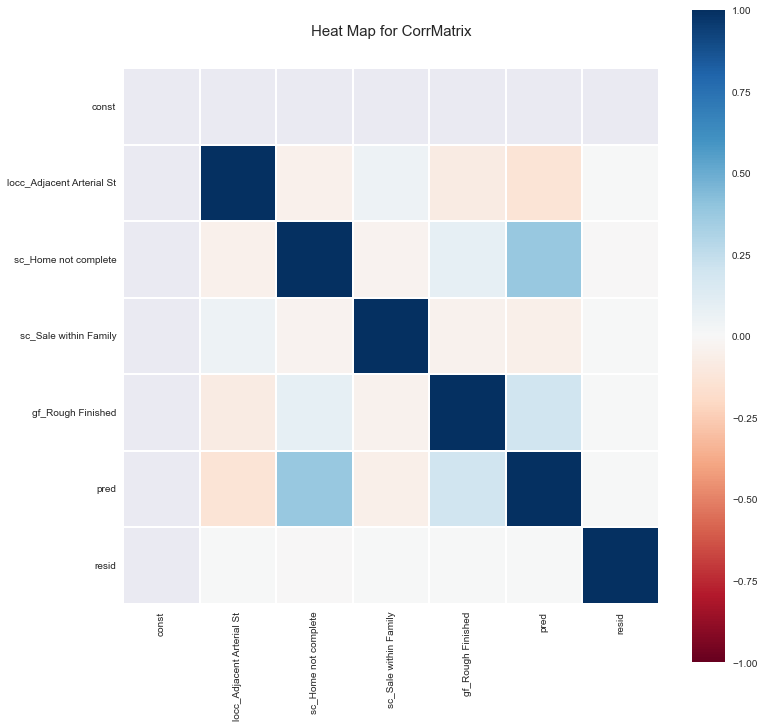

In [93]:
# CodeBlock Section 7e2
# heat map

colormap = plt.cm.RdBu
plt.figure(figsize=(12,12))
plt.title('Heat Map for CorrMatrix', y=1.05, size=15)
sns.heatmap(df_corrMatrix, linewidths=0.1, vmax=1.0, vmin=-1.0, square=True, cmap = colormap, linecolor= 'white', annot= False)

<Figure size 1440x576 with 0 Axes>

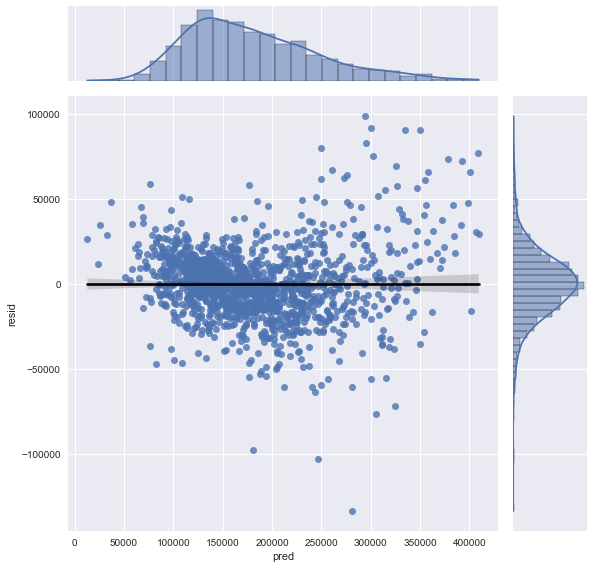

In [94]:
# CodeBlock Section 7e2
# Joint Plot.  
plt.style.use('seaborn')
plt.figure(figsize=(20,8))
sns.jointplot(y='resid', x='pred',kind='reg', data= X, ratio=5, height = 8, line_kws={'color': 'black'})

#  Section 7e3 Explanation of the Results 
• After assessing the model, explain what you see.  Also, answer the following questions: 
o Looking at the dummy feature nh_Northridge, explain what it means if the value 
for a home is 1 or 0.  Does the value of the home go up or down and by how 
much? 



The variable is no longer in the model. Consequently, on the final model there is no way to estimate the value of sale price would increase or decrease based on this variable. Nh_Northridge was dropped earlier because its p value was above 0.050 and was considered not significant. However, the value of 1 would indicated the price of a home would increase; the value of 0 would incidated the price of a home would decrease. 

o Looking at the dummy feature nh_Northwest Ames, explain what it means if the 
value for a home is 1 or 0.  Does the value of the home go up or down and by 
how much? 

The variable is no longer in the model. Consequently, on the final model there is no way to estimate the value of sale price would increase or decrease based on this variable. nh_Northwest Ames was dropped earlier because its p value was above 0.050 and was considered not significant.However, the value of 1 would indicated the price of a home would increase; the value of 0 would incidated the price of a home would decrease. 

o Select two more features and explain the relationship to ‘Sale Price’.

The assumption of normality is present in the jointplot. All of the vif are less than 5.00 and have no multi-collinearity. AIC is -5.942e+04 and BIC is -5.938e+04 are large negative numbers which indicates it’s a good model. R squared is 1.00 which indicates the relationship is strong between the target variable (sale price) and the feature variables. 


# Section 8-1
• Create a final dataset named df_realestate_model that includes (in order): 
o X (the final features – do not include the const) 
o y (‘Sale Price’) 
o Predicted y 
o Residual 

In [97]:
# CodeBlock Section 8-1
# dropping const and creating df_realestate_model
X = X.drop(['const'], axis=1)
df_realestate_model = X



In [98]:
# CodeBlock Section 8-1
# Final Model not including a const
X = df_realestate_model
y = df_realestate['Sale Price']


reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Sale Price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.791e+32
Date:                Fri, 25 Feb 2022   Prob (F-statistic):                        0.00
Time:                        17:23:29   Log-Likelihood:                          28873.
No. Observations:                1387   AIC:                                 -5.773e+04
Df Residuals:                    1381   BIC:                                 -5.770e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
locc_Adjacent Arterial St -9.641e-11   3.41e-11     -2.831      0.005   -1.63e-10   -2.96e-11
sc_Home not complete      -1.828e-10   2.22e-11     -8.221      0.000   -2.26e-10   -1.39e-10
sc_Sale within Family     -3.547e-11   4.97e-11     -0.713      0.476   -1.33e-10    6.21e-11
gf_Rough Finished         -5.548e-11   1.32e-11     -4.204      0.000   -8.14e-11   -2.96e-11
pred                          1.0000   4.03e-17   2.48e+16      0.000       1.000       1.000
resid                         1.0000   2.83e-16   3.54e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      341.910   Durbin-Watson:                   0.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              711.233
Skew:                           1.413   Prob(JB):                    3.61e-155
Kurtosis:                       5.078   Cond. No.                     1.62e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Section 8-2 Explain Results. 
• Create a code block and change it to markdown and explain actual y, predicted y, and 
its residual.  Use the first row as an example.

On the joint plot shows a normal distribution of the residuals which validates one of the assumptions in the regression model. Also, the jointplot shows that the standard deviation for homes less than 50,000 is more variability; the same observation in the standard deviation can be seen for homes over 250,000 as more pronounced. Therefore, one can estimate a more consistent prediction of the sales price for homes in the rage of 100,000 and 250,000. For example the first row is shows a variance in the price of the home value of 30,000 from the mean.


# 9. Summary and Explanation of All Steps 
Use this block to give a 
summary of the entire notebook and its results. 
o Explain the rationale for the process. 

The rationale for the process is to take the first model and asses the feature variables and evaluate the models significants and how each feature variable is related to the target variable (sale price) using the p value to determine if they are significant or not. Then this process continues by dropping the feature variables that are not significant and reevaluating the R squared and the P values once again. Reviewing the VIF values to make sure there is no multi collinearity. Also, reviewing the AIC and BIC to determine the effectiveness of the model compared to previous iterations of this process, that is a larger negative AIC/BIC number would indicate a better model. 
o What is the relationship between the features and target variable in the final 
model? 
The R squared and Adj R squared is 1.000 which indicates a strong relationship between the target variable (sale price) and feature variables. The p values on the feature variables are less than 0.050 which indicates they are significant. The jointplot of the residuals shows a normal distribution which supports the notion that the model is good. Also, the VIF values for the feature variables are less than 5.00 which indicates that there are no multi collinearity issues. 
o Include a summary of the practical implications of the results, what does it mean 
in real terms?

This model is good to predict the sale price based on these variables:

Locc_Adjacent Arterial St
Sc_Home not complete
Sc_Sale within Family
Gf_Rough Finished

Based on the negative coefficient for these feature variables, we are confident that the sale price will decrease. For example, the Locc_Adjacent Arterial St with a coefficient of -9.641e-11 contributes the most towards the decrease of the sale price, followed by gf_Rough Finished with a coefficient of -5.548e-11, followed by sc_Sale within Family with a coefficient of -3.547e-11, and finally sc_Home not complete with a coefficient of -1.828e-10.

